In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import jarque_bera
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer


In [102]:
data = pd.read_csv("Marketing_Data.csv")

In [103]:
df = data.copy()

In [104]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [105]:
df.shape

(171, 4)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [107]:
df.isnull().sum()

youtube      0
facebook     0
newspaper    0
sales        0
dtype: int64

In [108]:
X = sm.add_constant(df[['youtube', 'facebook', 'newspaper']])
y = df['sales']
model = sm.OLS(y, X).fit()
residuals = model.resid


In [109]:
residuals = model.resid


<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">Normal Dağılım Varsayımını Sağlayıp Sağlamadığını Nasıl Anlarız ? 
</h1>


<h1 style="background-color:#FFA500;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">1-Grafik Yöntemi
</h1>


###### 1.1-Histogram Analizi : 
Hata terimlerinin histogramları çizilerek dağılımın simetrik olup , olmadığı incelenir.

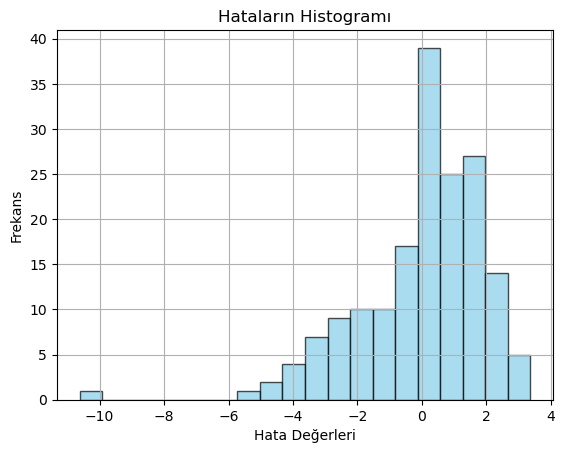

In [110]:
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Hataların Histogramı')
plt.xlabel('Hata Değerleri')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()

###### 1.2-Q-Q Plot Analizi : 
Gözlem değerleri ile normal dağılımın teorik değerlerini karşılaştırır . Eğer plotun üstünde sapmalar var ise normal dağılımın bozulduğunu söyleyebiliriz.

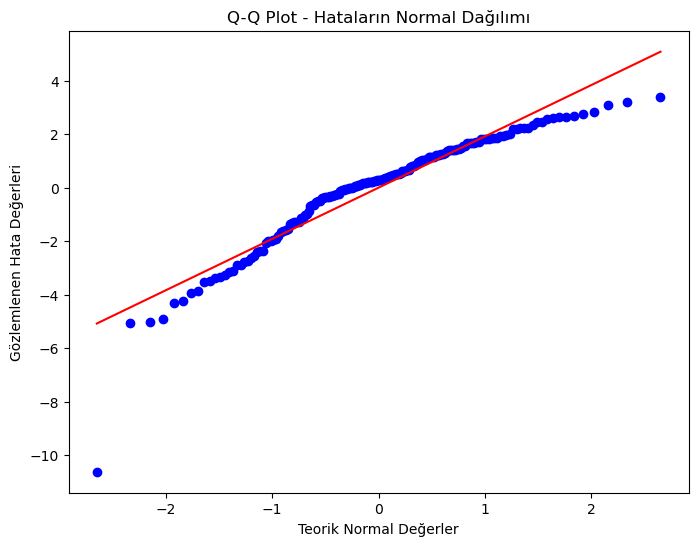

In [111]:
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot - Hataların Normal Dağılımı')
plt.xlabel('Teorik Normal Değerler')
plt.ylabel('Gözlemlenen Hata Değerleri')
plt.show()

###### 1.3-Residual Plot Analizi : Bağımsız değişkenlerin düzeyleri ile hata terimlerinin varyansının değişip değişmediğini gösterir. Heteroscedasticity durumları görsel olarak değerlendirilir.

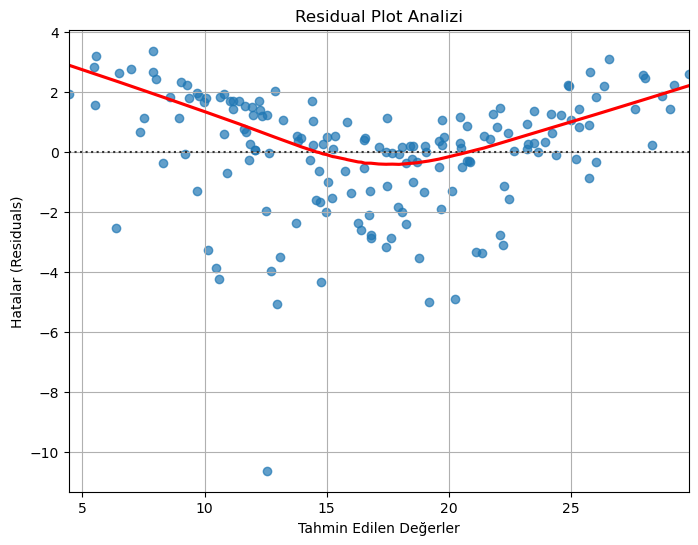

In [112]:
plt.figure(figsize=(8, 6))
sns.residplot(x=model.predict(X), y=residuals, lowess=True, scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('Residual Plot Analizi')
plt.xlabel('Tahmin Edilen Değerler')
plt.ylabel('Hatalar (Residuals)')
plt.grid(True)
plt.show()

<h1 style="background-color:#FFA500;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">2-İstatistiksel Testler 
</h1>

###### 2.1- Shapiro-Wilk Testi 

 $H_0$:Hata terimleri normal dağılır.
 
 $H_1$ : Hata terimleri normal dağılıma uymaz
 Eğer p-value 0.05'den küçük ise H0 hipotezi red edilir , yani hata terimleri normal dağılıma uymaz sonucuna varabiliriz.

In [113]:
stat, p_value = shapiro(residuals)

print(f'Shapiro-Wilk Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Shapiro-Wilk Test İstatistiği: 0.9139
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


###### 2.2 Kolmogorov-Smirnov Testi 

$H_0$ : Hata terimleri norrmal dağılıma uyar.
 
 $H_1$: Hata terimleri normal dağılıma uymaz .
 Eğer p-value 0.05'den küçük ise H0 hipotezi red edilir , yani hata terimleri normal dağılıma uymaz sonucuna varabiliriz. 

In [114]:
stat, p_value = kstest(residuals, 'norm')

print(f'Kolmogorov-Smirnov Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Kolmogorov-Smirnov Test İstatistiği: 0.1956
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


###### 2.3-Jarque-Bera Testi 

$H_0$: Örnek dağılımı normaldir.

$H_1$: Örnek dağılımı normal değildir.

In [115]:
stat, p_value = jarque_bera(residuals)


# Test sonuçlarını ekrana yazdır
print(f'Jarque-Bera Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

# H0 hipotezini değerlendir
alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Jarque-Bera Test İstatistiği: 162.7917
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


<h1 style="background-color:#3b5998;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">Normal Dağılım Varsayımı Bozulduğunda Nasıl Düzeltilir ? 
</h1>

<h1 style="background-color:#FFA500;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">1-Transformasyon Yöntemleri
</h1>


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">1.1. Logaritmik Dönüşüm:
</h1>

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">1) logp fonksiyonu kullanılarak ;
</h1>

In [116]:
epsilon = 1e-10
df['log_youtube'] = np.log(df['youtube'] + epsilon)
df['log_facebook'] = np.log(df['facebook'] + epsilon)
df['log_newspaper'] = np.log(df['newspaper'] + epsilon)
df['log_sales'] = np.log(df["sales"]+epsilon)

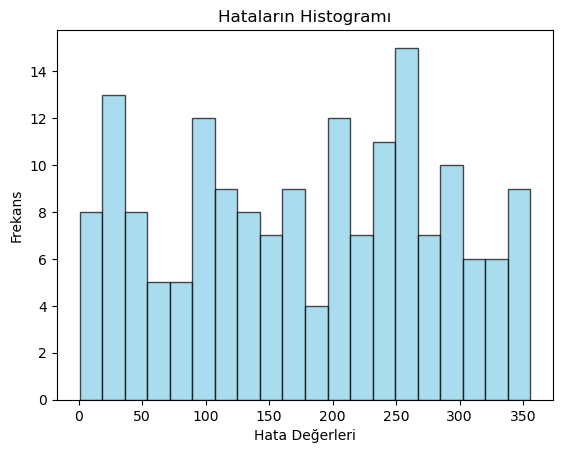

In [117]:
plt.hist(df['youtube'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Hataların Histogramı')
plt.xlabel('Hata Değerleri')
plt.ylabel('Frekans')
plt.show()


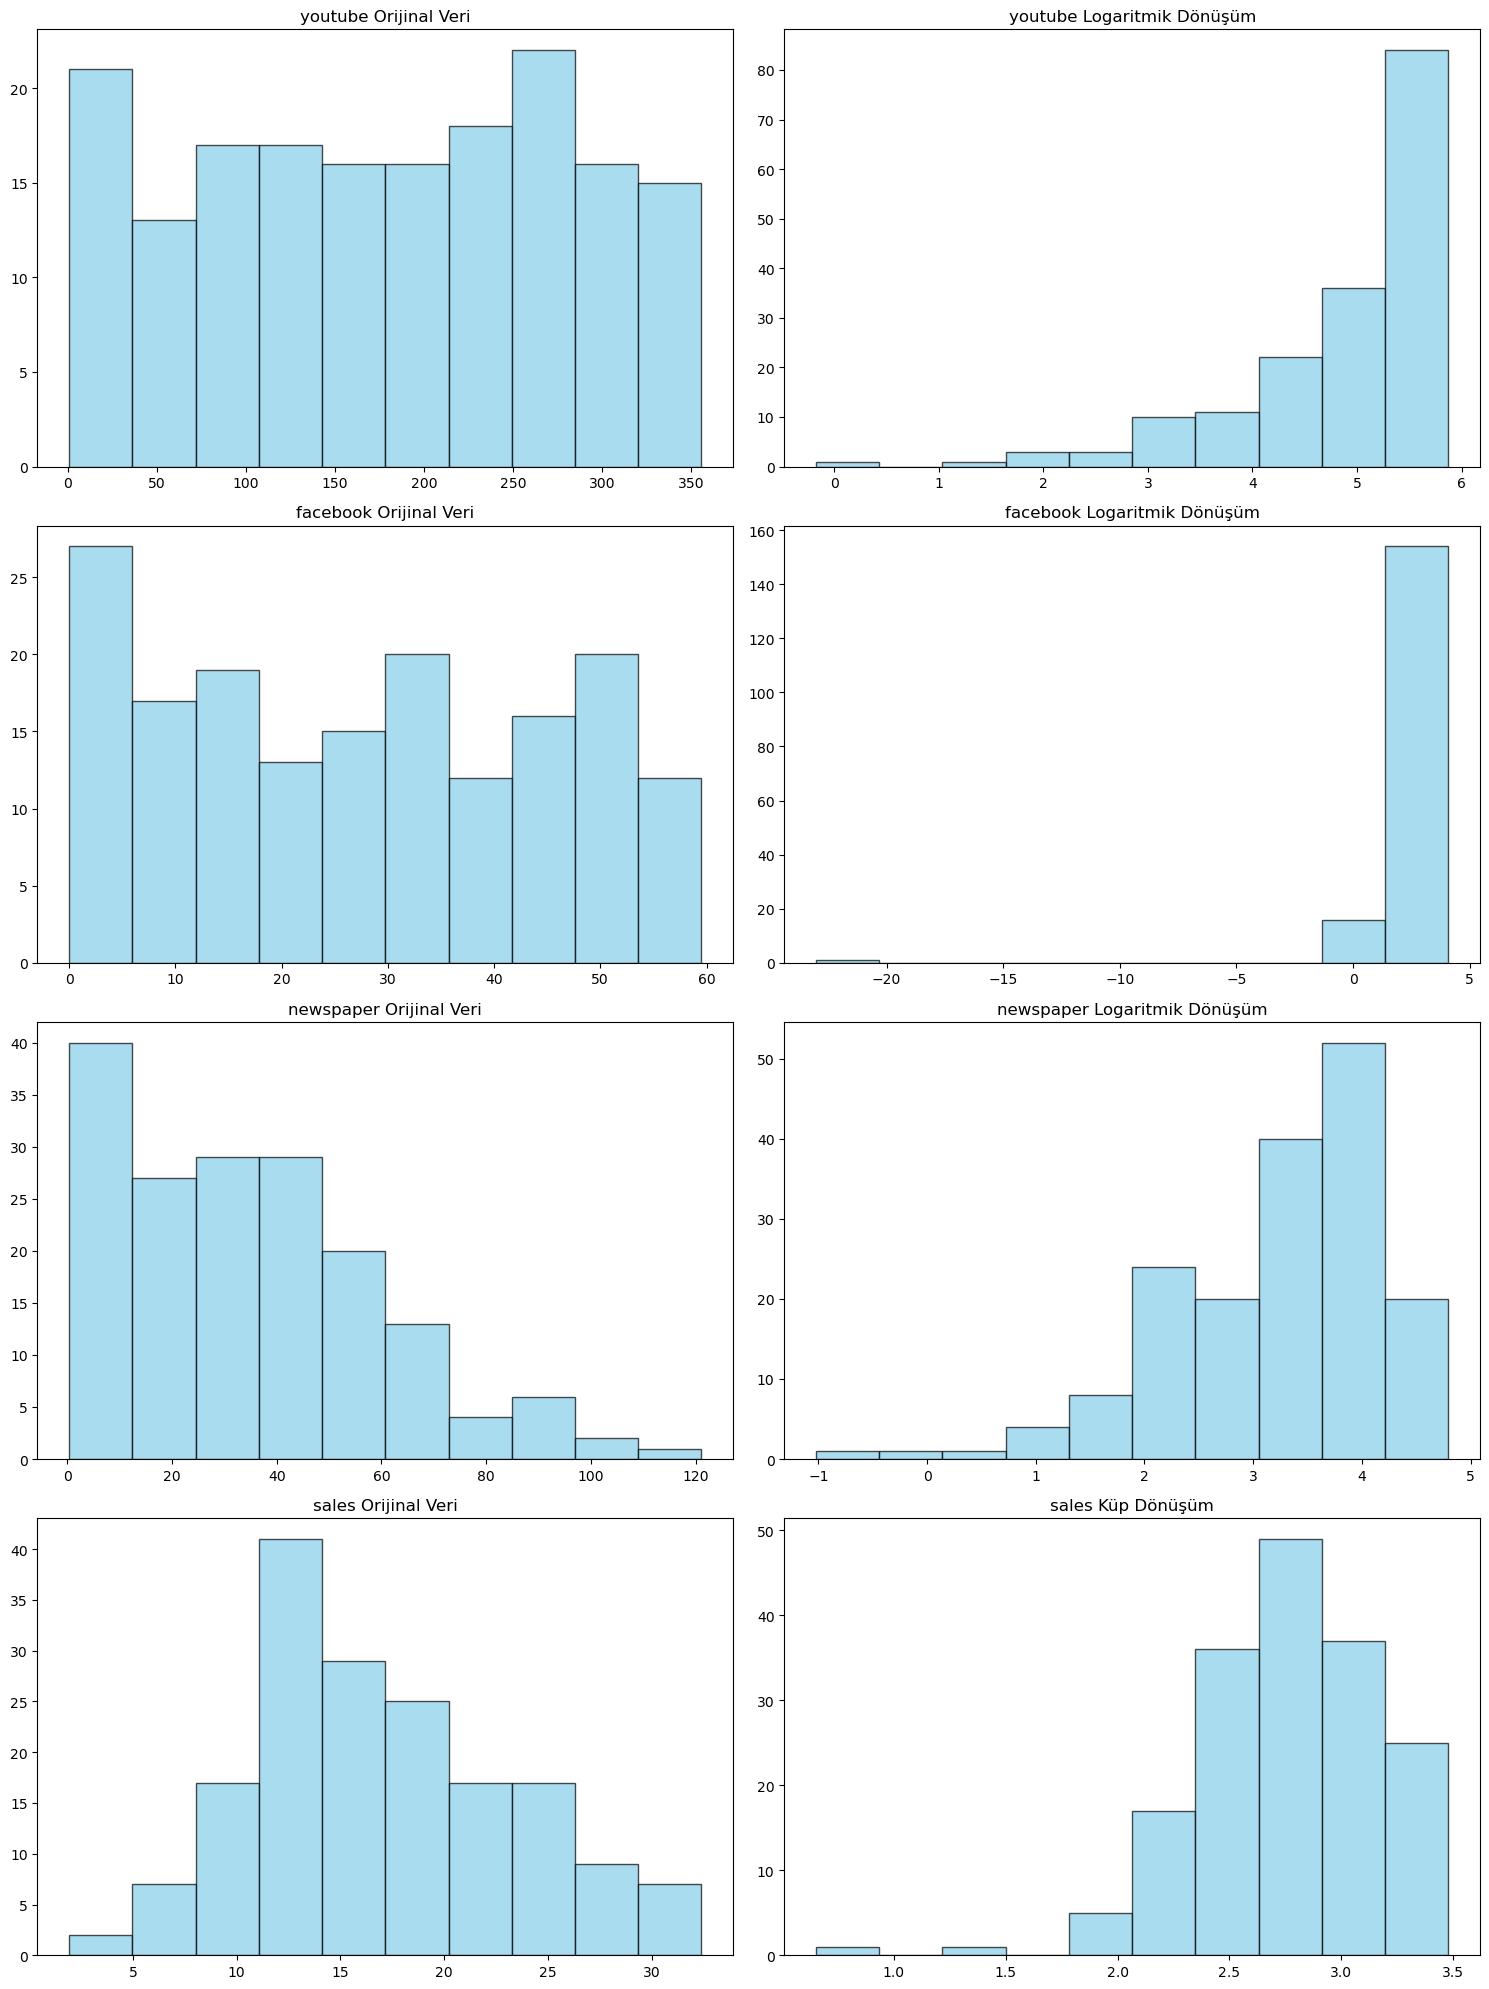

In [118]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
plt.hist(df['youtube'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('youtube Orijinal Veri')

plt.subplot(4, 2, 2)
plt.hist(df['log_youtube'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('youtube Logaritmik Dönüşüm')

plt.subplot(4, 2, 3)
plt.hist(df['facebook'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('facebook Orijinal Veri')

plt.subplot(4, 2, 4)
plt.hist(df['log_facebook'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('facebook Logaritmik Dönüşüm')

plt.subplot(4, 2, 5)
plt.hist(df['newspaper'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('newspaper Orijinal Veri')

plt.subplot(4, 2, 6)
plt.hist(df['log_newspaper'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('newspaper Logaritmik Dönüşüm')


plt.subplot(4, 2, 7)
plt.hist(df['sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('sales Orijinal Veri')

plt.subplot(4, 2, 8)
plt.hist(df['log_sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('sales Küp Dönüşüm')


plt.tight_layout()  # Adjust layout for better spacing
plt.show()

###### Logaritmik dönüşüm yaptıktan sonra tekrardan hataların normalliğini test edelim

In [119]:
X = sm.add_constant(df[['log_youtube', 'log_facebook', 'log_newspaper']])
y = df['log_sales']
model = sm.OLS(y, X).fit(disp=0)  # disp=0 uyarıları bastırır
residuals = model.resid

###### Shapiro-Wilk Testi

In [120]:
stat, p_value = shapiro(residuals)

print(f'Shapiro-Wilk Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Shapiro-Wilk Test İstatistiği: 0.9634
p-value: 0.0002
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


###### Kolmogorov-Smirnov Testi

In [121]:
stat, p_value = kstest(residuals, 'norm')

print(f'Kolmogorov-Smirnov Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Kolmogorov-Smirnov Test İstatistiği: 0.3601
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


###### Jarque-Bera Testi

In [122]:
stat, p_value = jarque_bera(residuals)


# Test sonuçlarını ekrana yazdır
print(f'Jarque-Bera Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

# H0 hipotezini değerlendir
alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Jarque-Bera Test İstatistiği: 34.7863
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


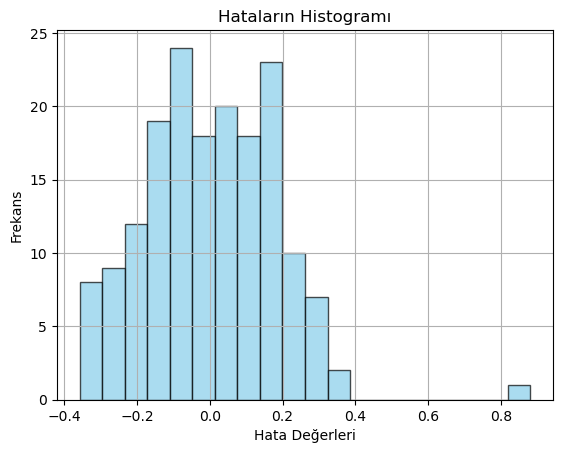

In [123]:
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Hataların Histogramı')
plt.xlabel('Hata Değerleri')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">1) log1p fonksiyonu kullanılarak ;
</h1>

In [124]:
epsilon = 1e-10  
df['log_youtube'] = np.log1p(df['youtube']+epsilon)
df['log_facebook'] = np.log1p(df['facebook']+epsilon)
df['log_newspaper'] = np.log1p(df['newspaper']+epsilon)
df['log_sales'] = np.log1p(df["sales"]+epsilon)

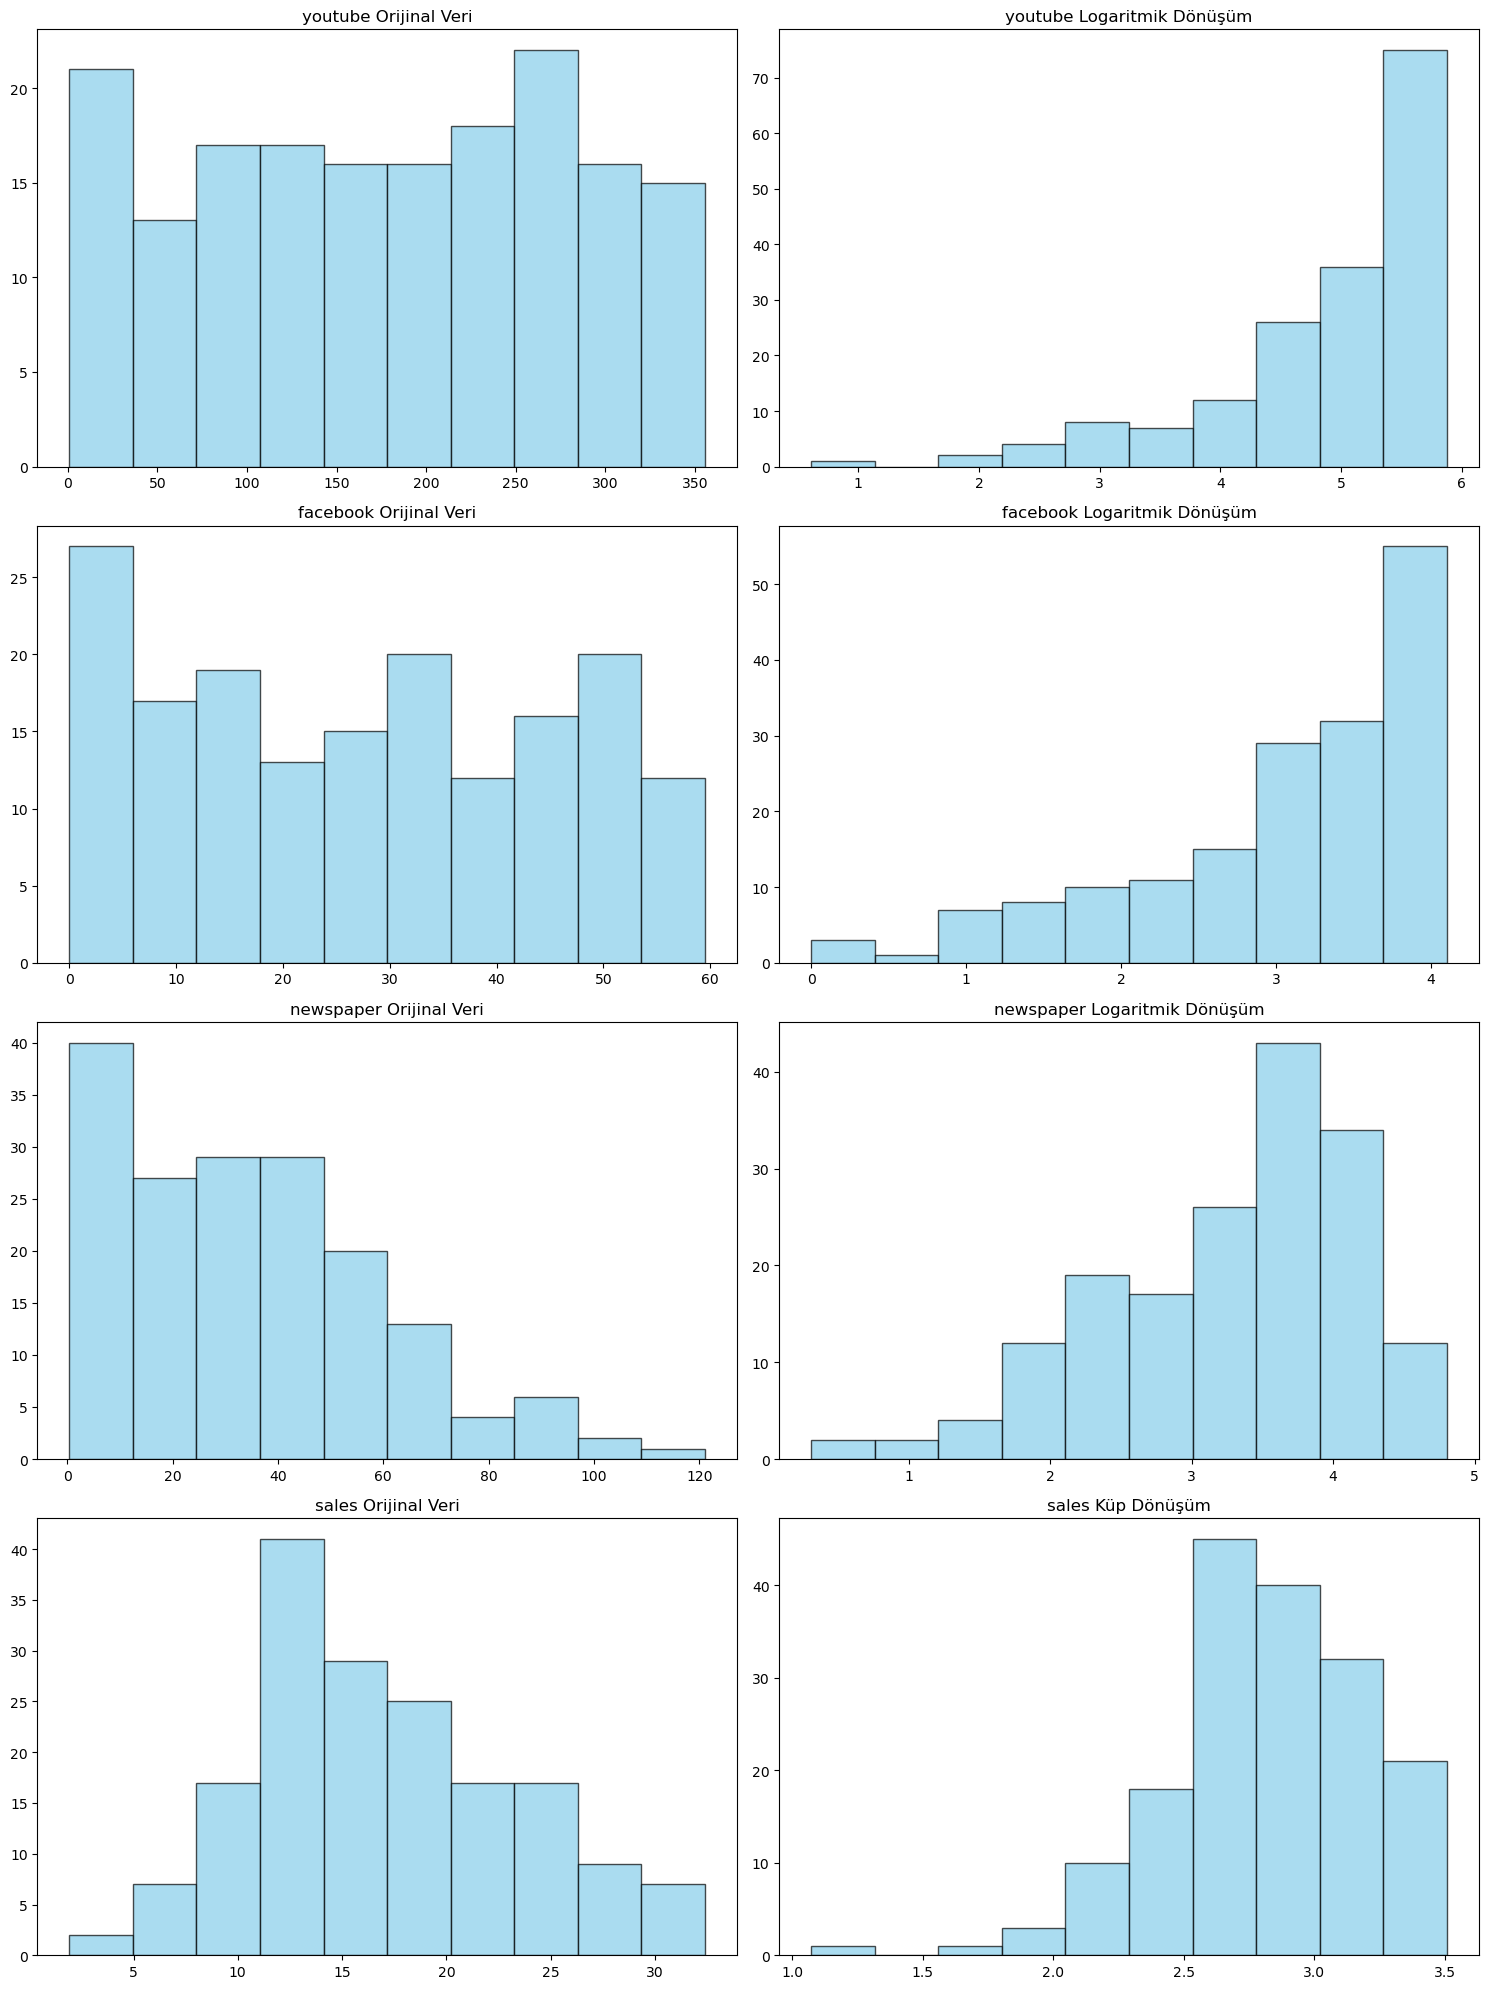

In [125]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
plt.hist(df['youtube'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('youtube Orijinal Veri')

plt.subplot(4, 2, 2)
plt.hist(df['log_youtube'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('youtube Logaritmik Dönüşüm')

plt.subplot(4, 2, 3)
plt.hist(df['facebook'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('facebook Orijinal Veri')

plt.subplot(4, 2, 4)
plt.hist(df['log_facebook'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('facebook Logaritmik Dönüşüm')

plt.subplot(4, 2, 5)
plt.hist(df['newspaper'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('newspaper Orijinal Veri')

plt.subplot(4, 2, 6)
plt.hist(df['log_newspaper'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('newspaper Logaritmik Dönüşüm')


plt.subplot(4, 2, 7)
plt.hist(df['sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('sales Orijinal Veri')

plt.subplot(4, 2, 8)
plt.hist(df['log_sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('sales Küp Dönüşüm')


plt.tight_layout()  # Adjust layout for better spacing
plt.show()

#### Logaritmik dönüşüm yaptıktan sonra tekrardan hataların normalliğini test edelim


In [126]:
X = sm.add_constant(df[['youtube', 'facebook', 'newspaper']])
y = df['log_sales']
model = sm.OLS(y, X).fit(disp=0)  # disp=0 uyarıları bastırır
residuals = model.resid

#### Shapiro Wilk

In [127]:
stat, p_value = shapiro(residuals)

print(f'Shapiro-Wilk Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Shapiro-Wilk Test İstatistiği: 0.6687
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


#### Kolmogorov-Smirnov Testi

In [128]:
stat, p_value = kstest(residuals, 'norm')

print(f'Kolmogorov-Smirnov Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Kolmogorov-Smirnov Test İstatistiği: 0.4266
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


#### Jarque-Bera Testi

In [129]:
stat, p_value = jarque_bera(residuals)


# Test sonuçlarını ekrana yazdır
print(f'Jarque-Bera Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

# H0 hipotezini değerlendir
alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Jarque-Bera Test İstatistiği: 7815.5361
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


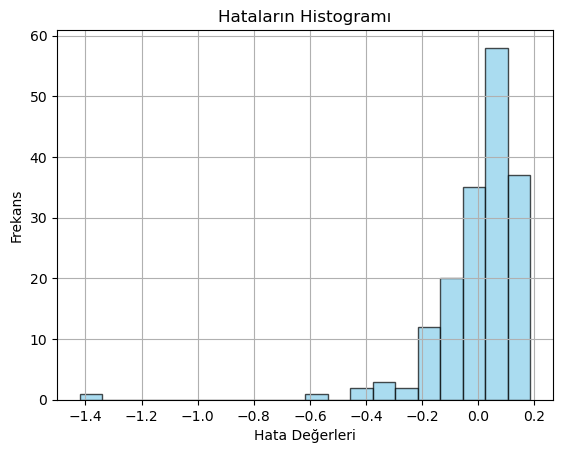

In [130]:
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Hataların Histogramı')
plt.xlabel('Hata Değerleri')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">np.log10 kullanılarak
</h1>

In [131]:
epsilon = 1e-10  
df['log_youtube'] = np.log10(df['youtube'] + epsilon)
df['log_facebook'] = np.log10(df['facebook'] + epsilon)
df['log_newspaper'] = np.log10(df['newspaper'] + epsilon)
df['log_sales'] = np.log10(df["sales"]+epsilon)

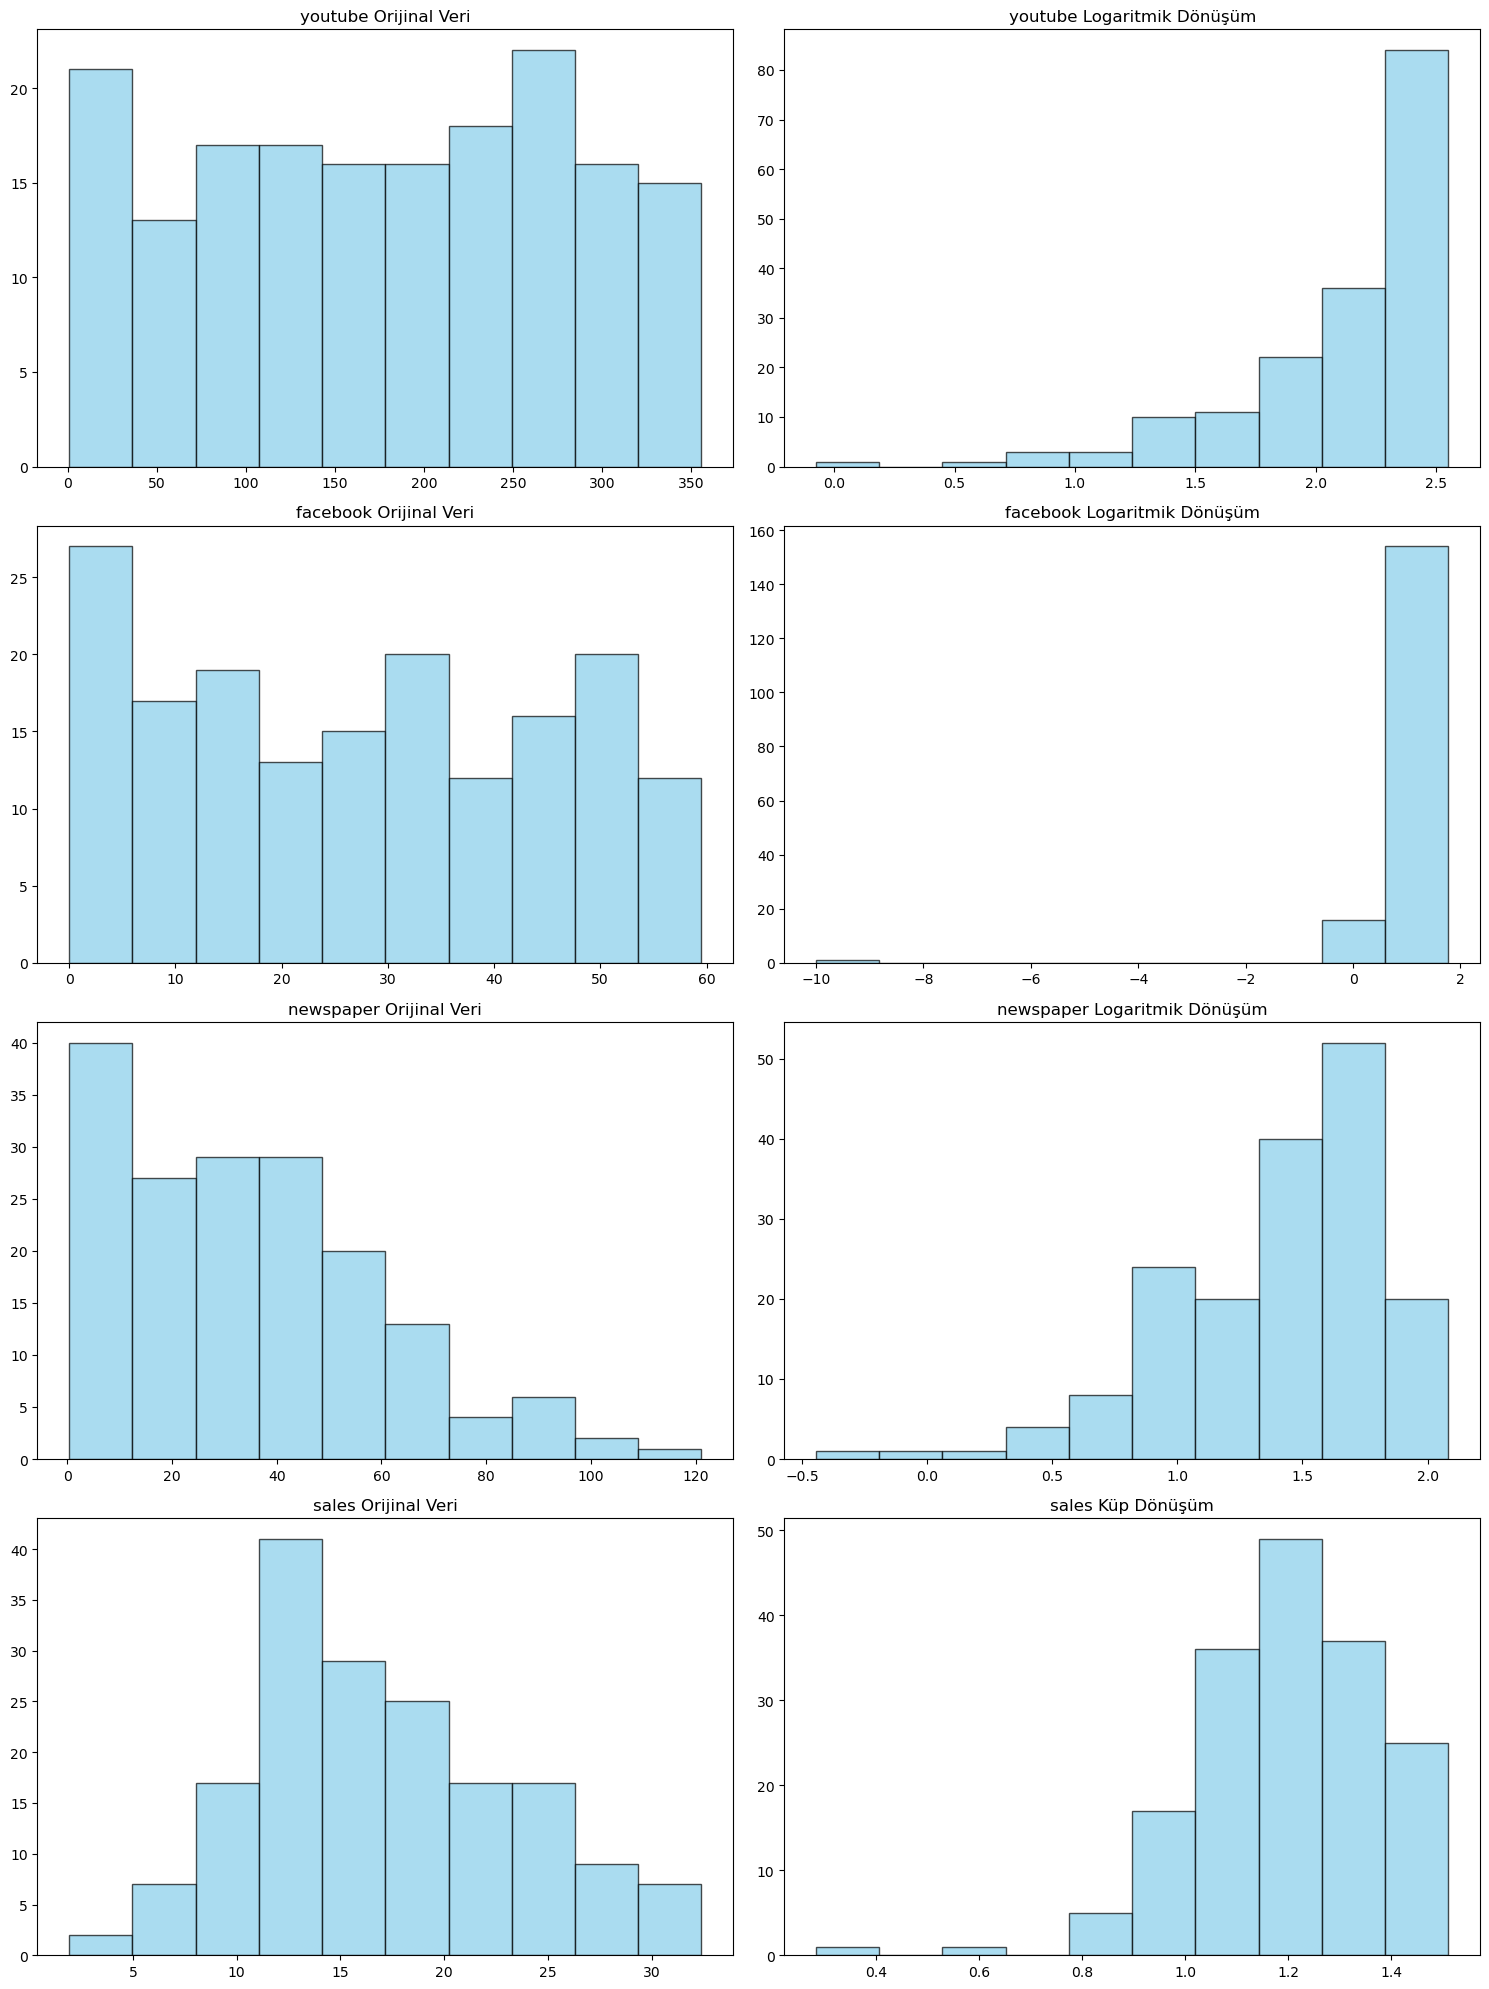

In [132]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
plt.hist(df['youtube'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('youtube Orijinal Veri')

plt.subplot(4, 2, 2)
plt.hist(df['log_youtube'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('youtube Logaritmik Dönüşüm')

plt.subplot(4, 2, 3)
plt.hist(df['facebook'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('facebook Orijinal Veri')

plt.subplot(4, 2, 4)
plt.hist(df['log_facebook'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('facebook Logaritmik Dönüşüm')

plt.subplot(4, 2, 5)
plt.hist(df['newspaper'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('newspaper Orijinal Veri')

plt.subplot(4, 2, 6)
plt.hist(df['log_newspaper'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('newspaper Logaritmik Dönüşüm')


plt.subplot(4, 2, 7)
plt.hist(df['sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('sales Orijinal Veri')

plt.subplot(4, 2, 8)
plt.hist(df['log_sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('sales Küp Dönüşüm')


plt.tight_layout()  # Adjust layout for better spacing
plt.show()

#### Logaritmik dönüşüm yaptıktan sonra tekrardan hataların normalliğini test edelim


In [133]:
X = sm.add_constant(df[['log_youtube', 'log_facebook', 'log_newspaper']])
y = df['log_sales']
model = sm.OLS(y, X).fit(disp=0)  
residuals = model.resid

#### Shapiro Wilk

In [134]:
stat, p_value = shapiro(residuals)

print(f'Shapiro-Wilk Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Shapiro-Wilk Test İstatistiği: 0.9634
p-value: 0.0002
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


#### Kolmogorov-Smirnov Testi

In [135]:
stat, p_value = kstest(residuals, 'norm')

print(f'Kolmogorov-Smirnov Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Kolmogorov-Smirnov Test İstatistiği: 0.4382
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


#### Jarque-Bera Testi

In [136]:
stat, p_value = jarque_bera(residuals)


# Test sonuçlarını ekrana yazdır
print(f'Jarque-Bera Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

# H0 hipotezini değerlendir
alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Jarque-Bera Test İstatistiği: 34.7863
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


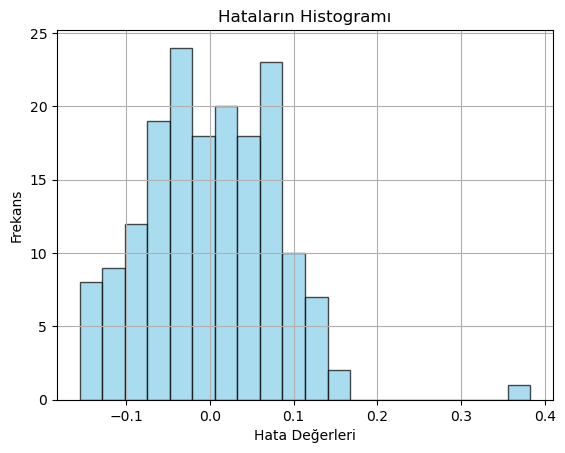

In [137]:
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Hataların Histogramı')
plt.xlabel('Hata Değerleri')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">np.log2 kullanılarak
</h1>

In [138]:
epsilon = 1e-10
df['log_youtube'] = np.log2(df['youtube'] + epsilon)
df['log_facebook'] = np.log2(df['facebook'] + epsilon)
df['log_newspaper'] = np.log2(df['newspaper'] + epsilon)
df['log_sales'] = np.log2(df["sales"]+epsilon)

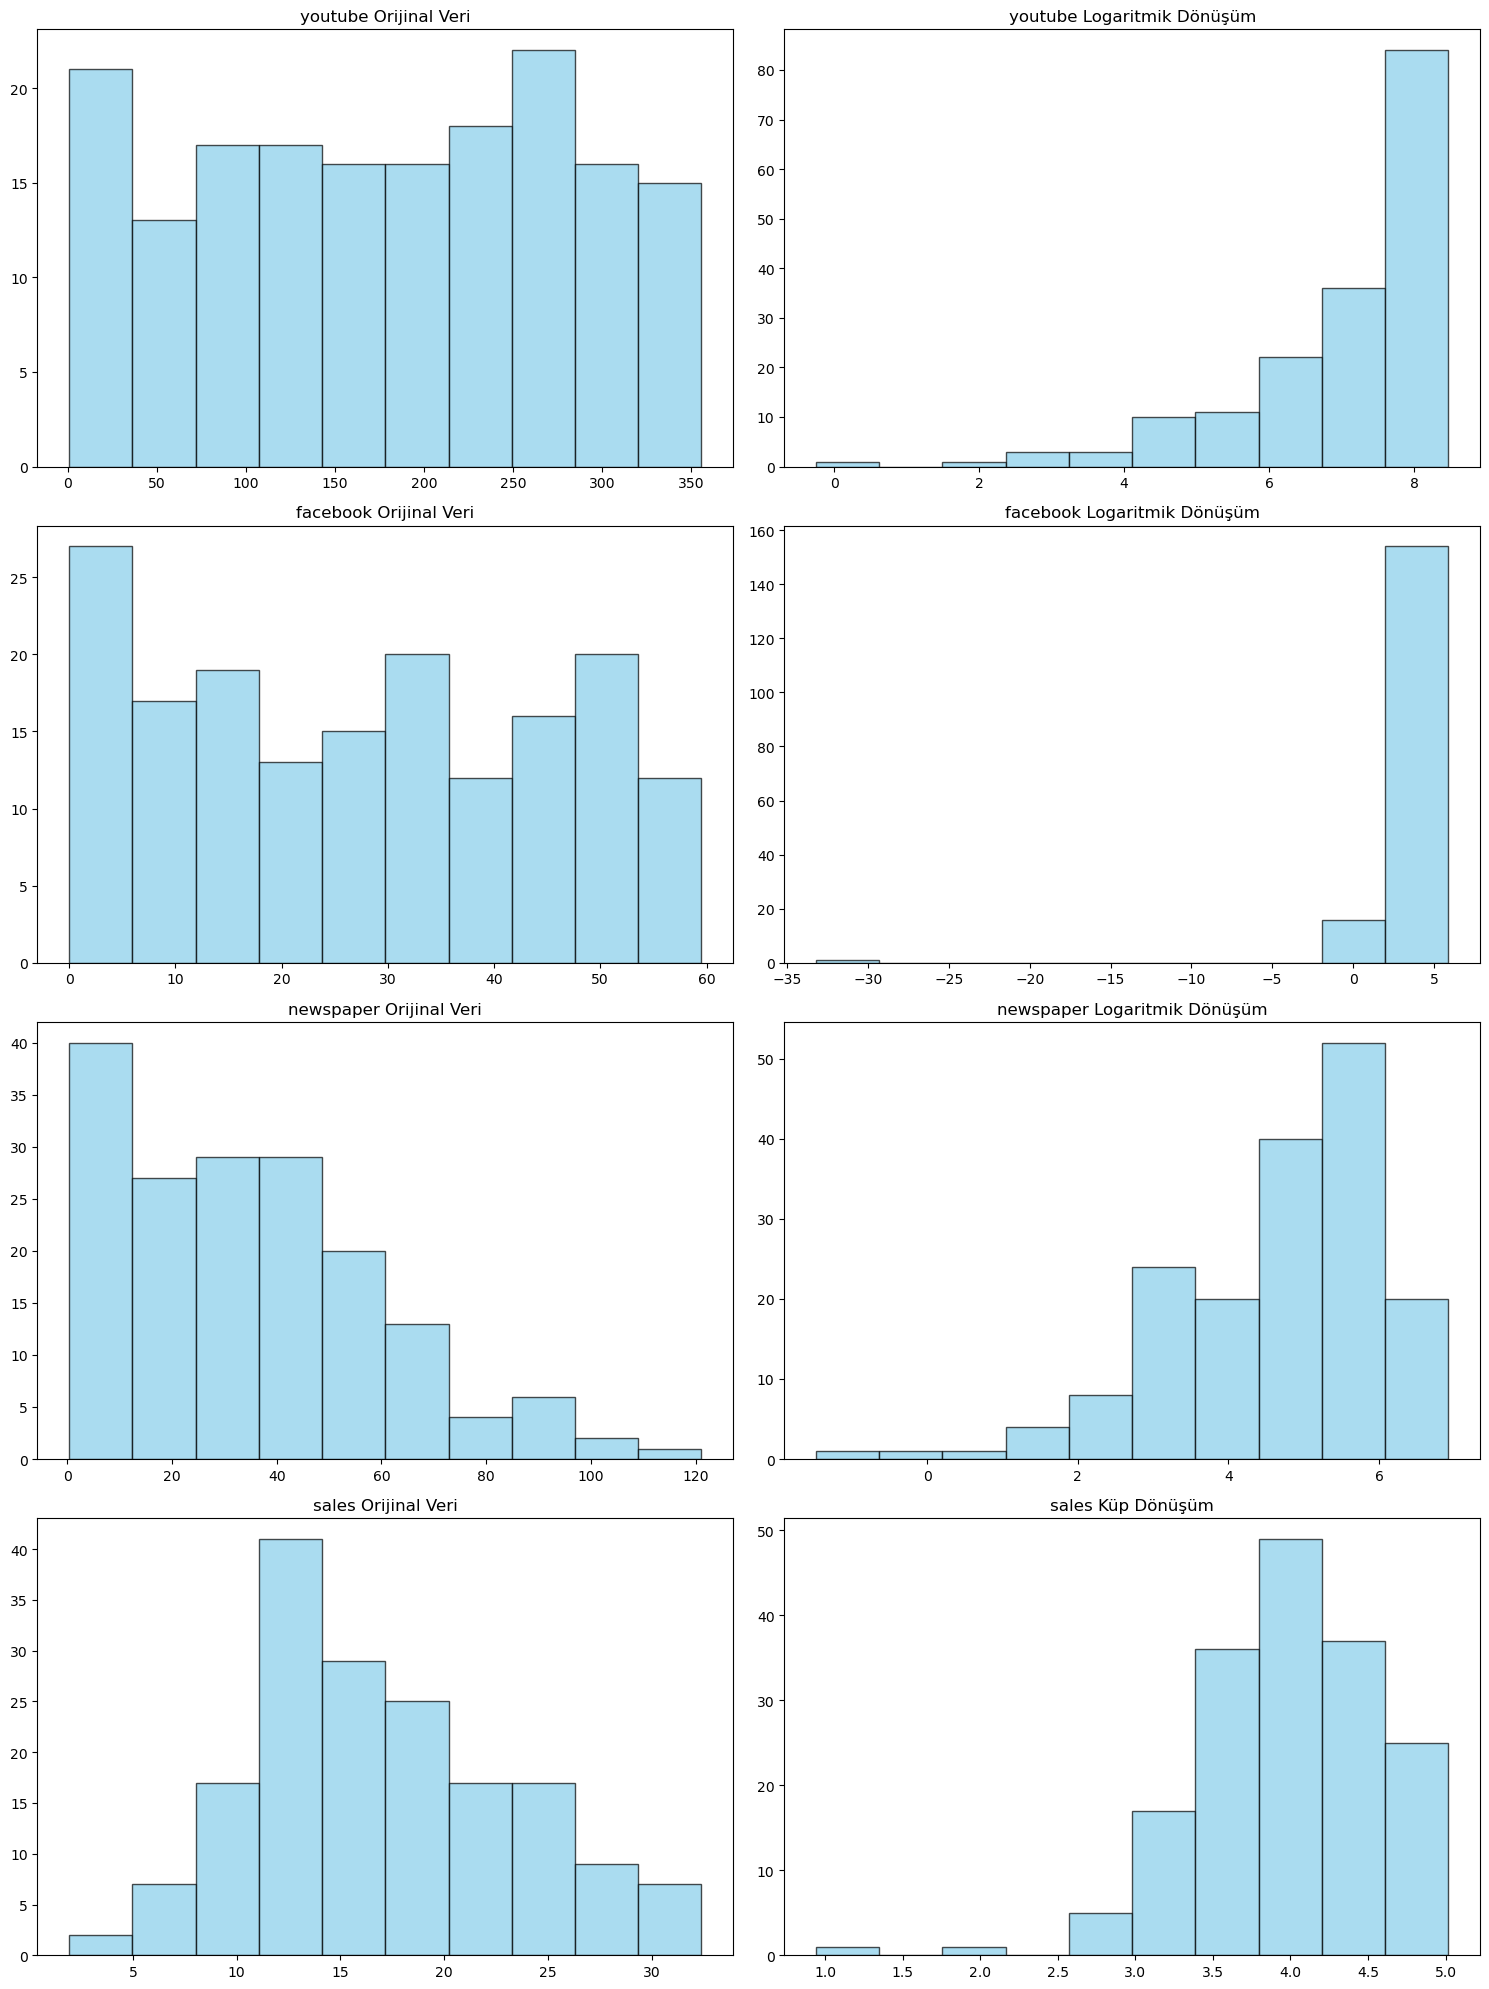

In [139]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
plt.hist(df['youtube'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('youtube Orijinal Veri')

plt.subplot(4, 2, 2)
plt.hist(df['log_youtube'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('youtube Logaritmik Dönüşüm')

plt.subplot(4, 2, 3)
plt.hist(df['facebook'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('facebook Orijinal Veri')

plt.subplot(4, 2, 4)
plt.hist(df['log_facebook'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('facebook Logaritmik Dönüşüm')

plt.subplot(4, 2, 5)
plt.hist(df['newspaper'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('newspaper Orijinal Veri')

plt.subplot(4, 2, 6)
plt.hist(df['log_newspaper'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('newspaper Logaritmik Dönüşüm')


plt.subplot(4, 2, 7)
plt.hist(df['sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('sales Orijinal Veri')

plt.subplot(4, 2, 8)
plt.hist(df['log_sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('sales Küp Dönüşüm')


plt.tight_layout()  # Adjust layout for better spacing
plt.show()

###### Logaritmik dönüşüm yaptıktan sonra tekrardan hataların normalliğini test edelim

In [140]:
X = sm.add_constant(df[['log_youtube', 'log_facebook', 'log_newspaper']])
y = df['log_sales']
model = sm.OLS(y, X).fit(disp=0)  
residuals = model.resid

###### Shapiro Wilk

In [141]:
stat, p_value = shapiro(residuals)

print(f'Shapiro-Wilk Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Shapiro-Wilk Test İstatistiği: 0.9634
p-value: 0.0002
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


###### Kolmogorov-Smirnov Testi

In [142]:
stat, p_value = kstest(residuals, 'norm')

print(f'Kolmogorov-Smirnov Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Kolmogorov-Smirnov Test İstatistiği: 0.3085
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


###### Jarque-Bera Testi

In [143]:
stat, p_value = jarque_bera(residuals)


# Test sonuçlarını ekrana yazdır
print(f'Jarque-Bera Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

# H0 hipotezini değerlendir
alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Jarque-Bera Test İstatistiği: 34.7863
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


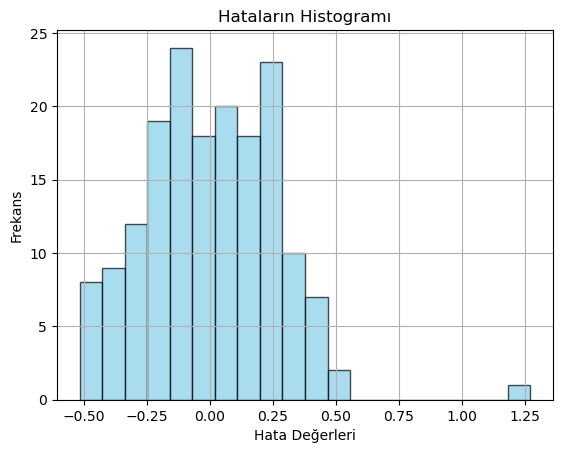

In [144]:
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Hataların Histogramı')
plt.xlabel('Hata Değerleri')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">1.2. Karekök Dönüşüm:
</h1>

In [145]:
df['sqrt_youtube'] = np.sqrt(df['youtube'])
df['sqrt_facebook'] = np.sqrt(df['facebook'])
df['sqrt_newspaper'] = np.sqrt(df['newspaper'])
df['sqrt_sales'] = np.sqrt(df['sales'])

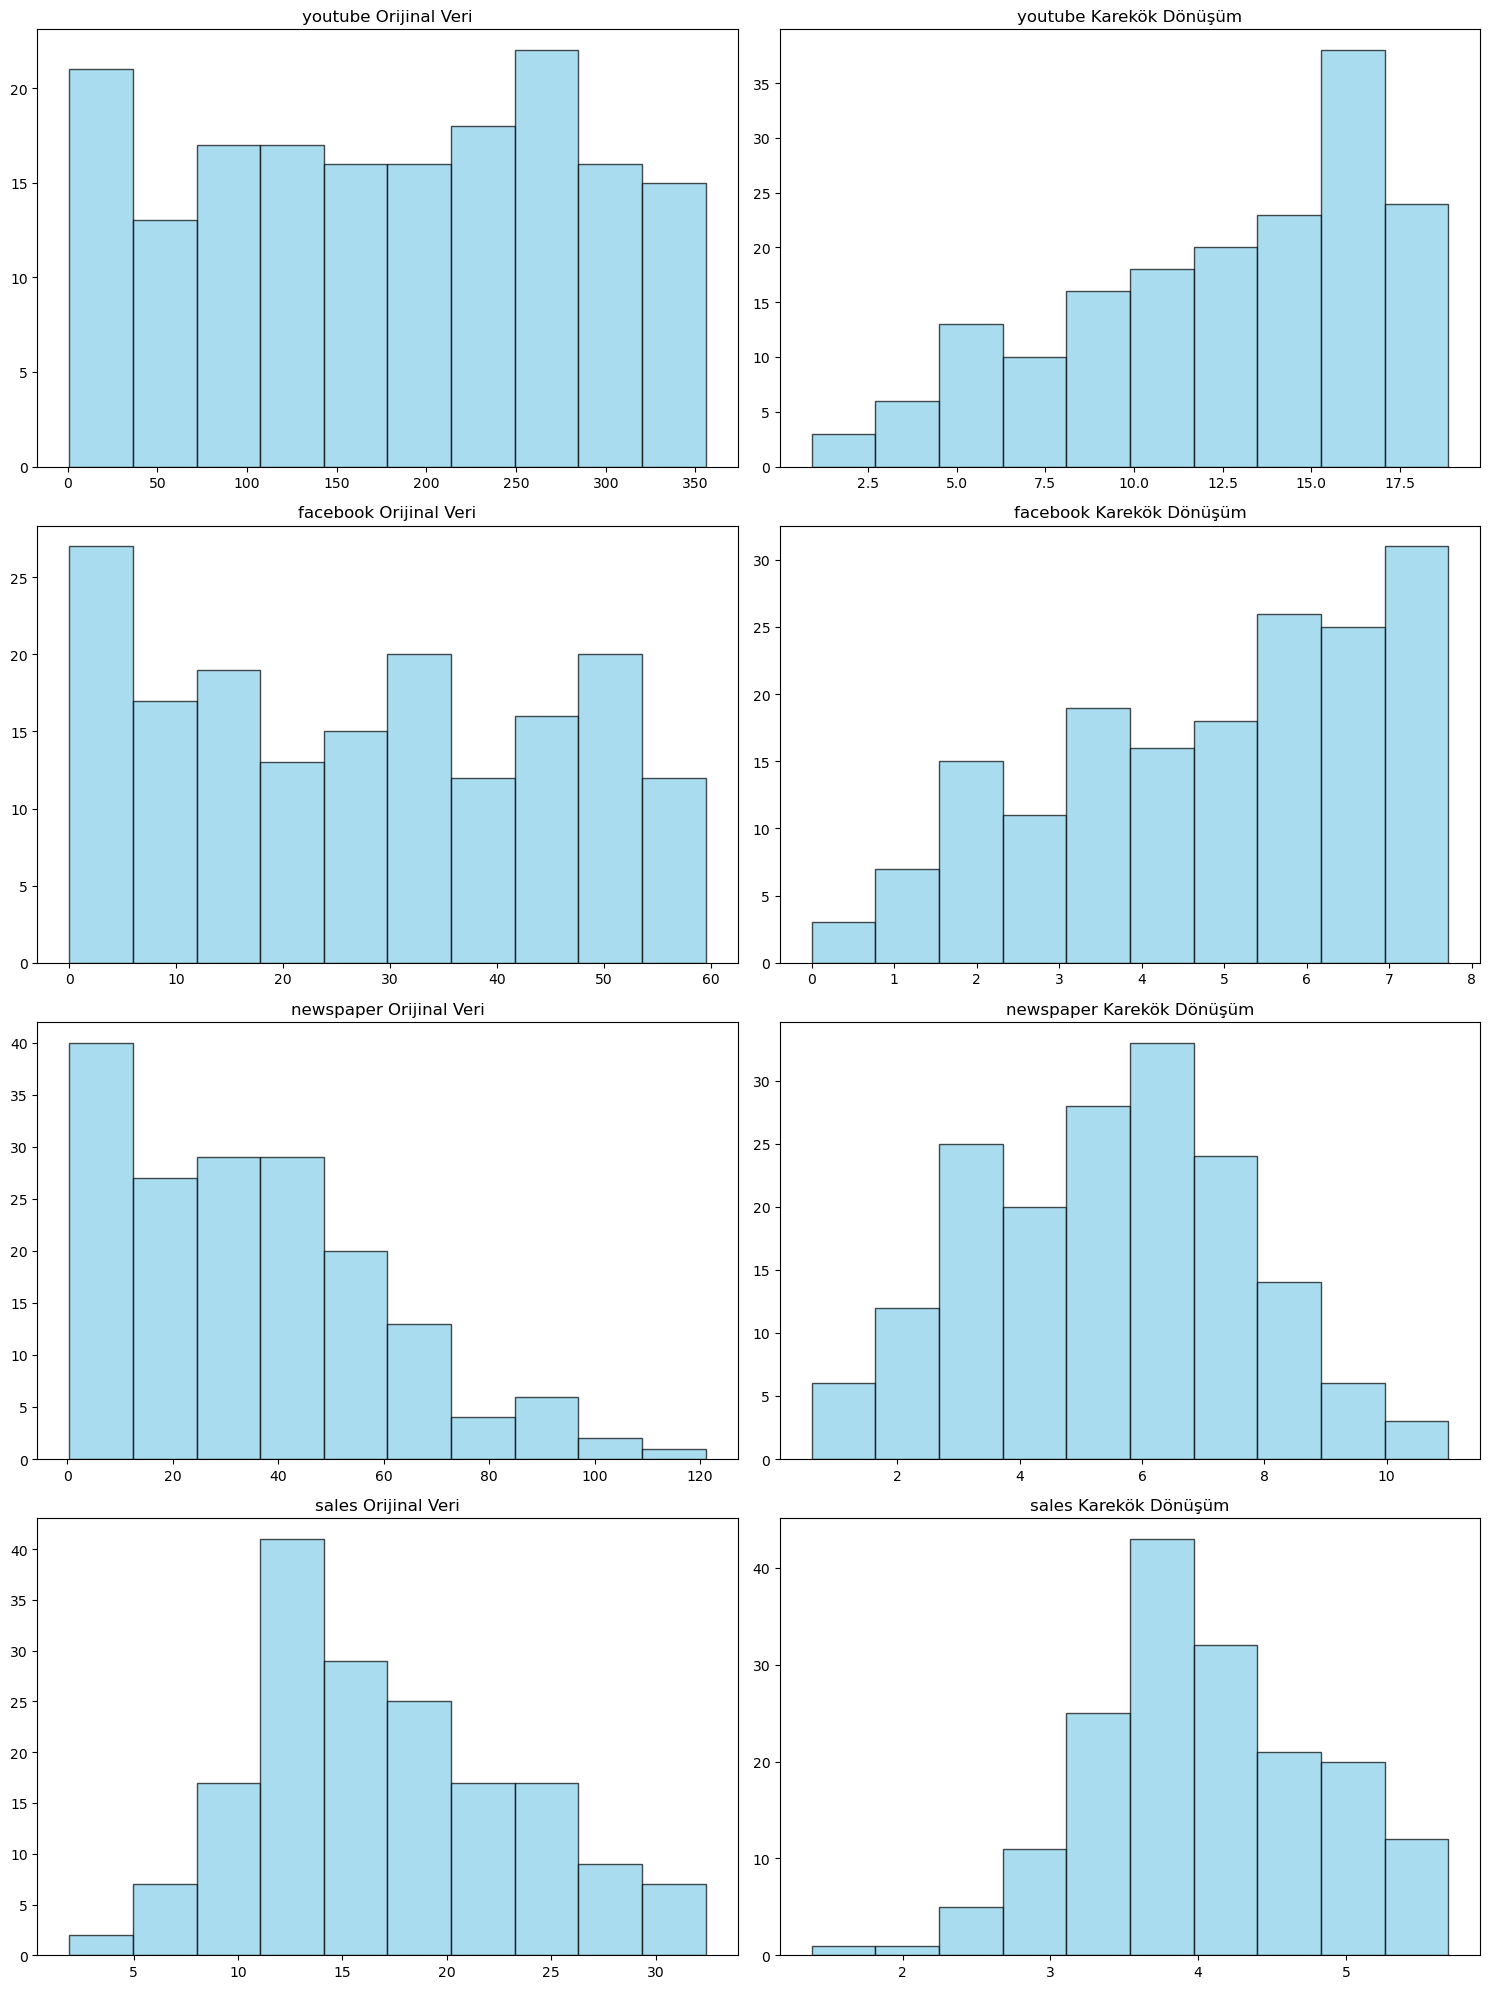

In [146]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
plt.hist(df['youtube'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('youtube Orijinal Veri')

plt.subplot(4, 2, 2)
plt.hist(df['sqrt_youtube'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('youtube Karekök Dönüşüm')

plt.subplot(4, 2, 3)
plt.hist(df['facebook'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('facebook Orijinal Veri')

plt.subplot(4, 2, 4)
plt.hist(df['sqrt_facebook'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('facebook Karekök Dönüşüm')

plt.subplot(4, 2, 5)
plt.hist(df['newspaper'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('newspaper Orijinal Veri')

plt.subplot(4, 2, 6)
plt.hist(df['sqrt_newspaper'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('newspaper Karekök Dönüşüm')

plt.subplot(4, 2, 7)
plt.hist(df['sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('sales Orijinal Veri')

plt.subplot(4, 2, 8)
plt.hist(df['sqrt_sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('sales Karekök Dönüşüm')


plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [147]:
X_sqrt = sm.add_constant(df[['sqrt_youtube', 'sqrt_facebook', 'sqrt_newspaper']])
y_sqrt = df['sqrt_sales']
model_sqrt = sm.OLS(y_sqrt, X_sqrt).fit(disp=0)
residuals_sqrt = model_sqrt.resid

###### Shapiro Wilk

In [148]:
stat, p_value = shapiro(residuals_sqrt)

print(f'Shapiro-Wilk Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Shapiro-Wilk Test İstatistiği: 0.9062
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


###### Kolmogorov-Smirnov


In [149]:
stat, p_value = kstest(residuals_sqrt, 'norm')

print(f'Kolmogorov-Smirnov Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Kolmogorov-Smirnov Test İstatistiği: 0.3405
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


###### Jarque-Bera Testi


In [150]:
stat, p_value = jarque_bera(residuals_sqrt)

print(f'Jarque-Bera Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Jarque-Bera Test İstatistiği: 627.2933
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


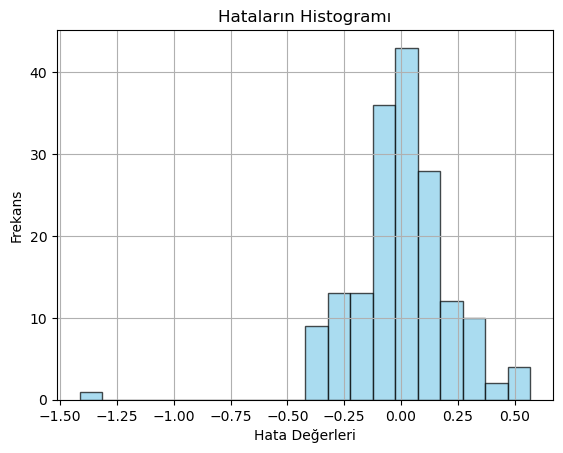

In [151]:
plt.hist(residuals_sqrt, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Hataların Histogramı')
plt.xlabel('Hata Değerleri')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">1.3. Küp Dönüşüm:
</h1>

In [152]:
df['cube_youtube'] = np.cbrt(df['youtube'])
df['cube_facebook'] = np.cbrt(df['facebook'])
df['cube_newspaper'] = np.cbrt(df['newspaper'])
df['cube_sales'] = np.cbrt(df['sales'])

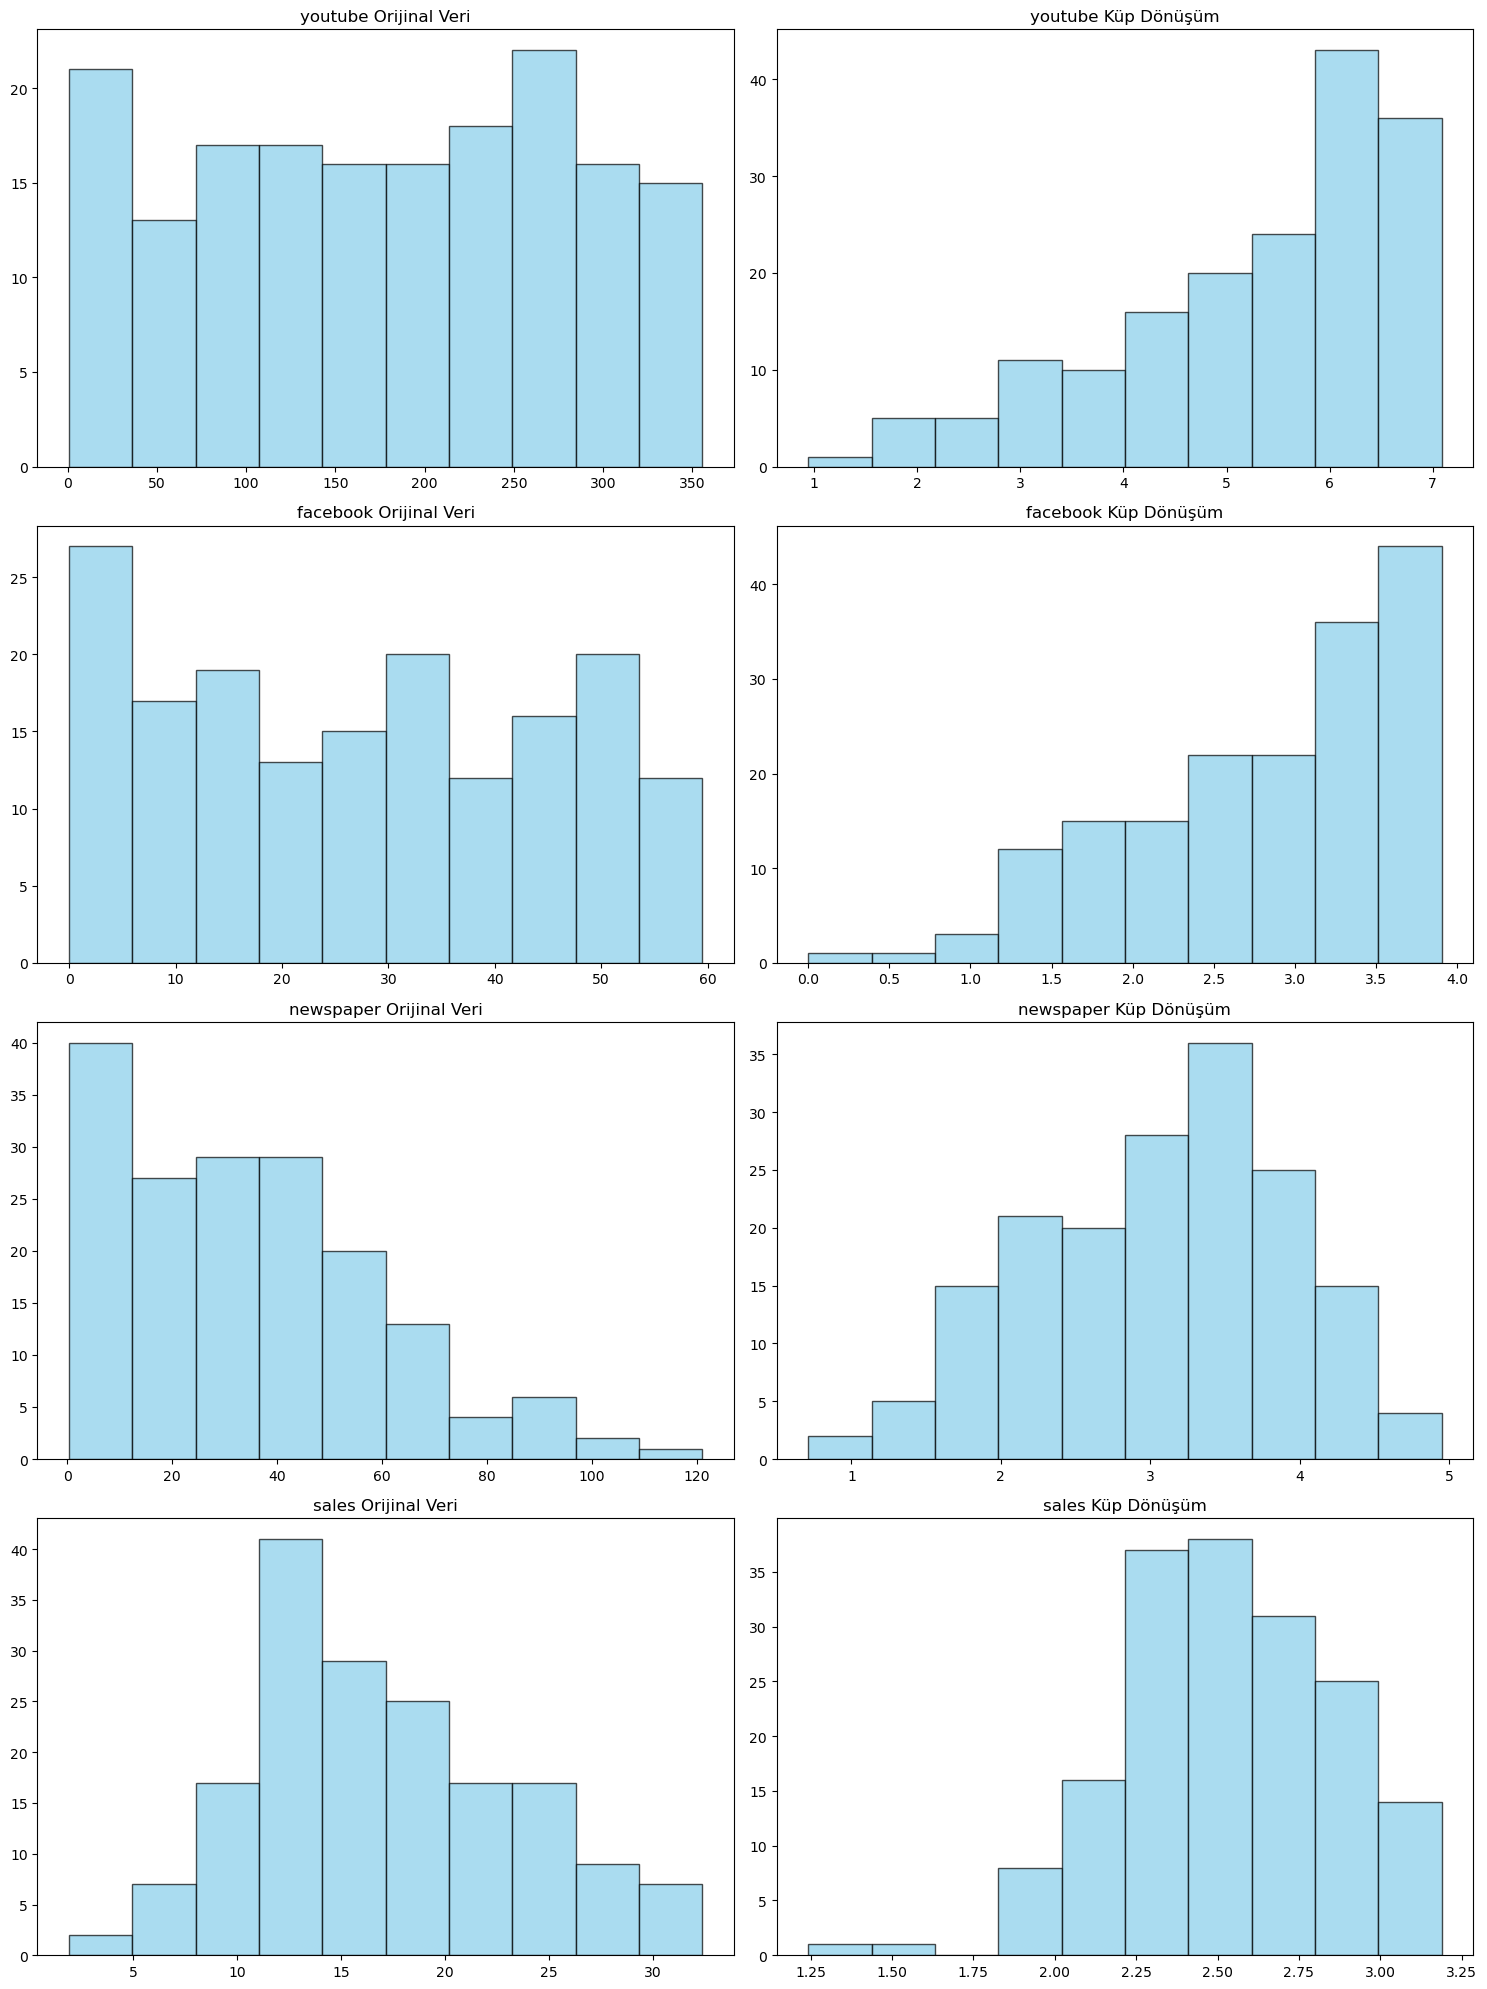

In [153]:
plt.figure(figsize=(15, 20))

# Orijinal Veri
plt.subplot(4, 2, 1)
plt.hist(df['youtube'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('youtube Orijinal Veri')

plt.subplot(4, 2, 2)
plt.hist(df['cube_youtube'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('youtube Küp Dönüşüm')

plt.subplot(4, 2, 3)
plt.hist(df['facebook'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('facebook Orijinal Veri')

plt.subplot(4, 2, 4)
plt.hist(df['cube_facebook'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('facebook Küp Dönüşüm')

plt.subplot(4, 2, 5)
plt.hist(df['newspaper'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('newspaper Orijinal Veri')

plt.subplot(4, 2, 6)
plt.hist(df['cube_newspaper'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('newspaper Küp Dönüşüm')

plt.subplot(4, 2, 7)
plt.hist(df['sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('sales Orijinal Veri')

plt.subplot(4, 2, 8)
plt.hist(df['cube_sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('sales Küp Dönüşüm')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [154]:
X_cube = sm.add_constant(df[['cube_youtube', 'cube_facebook', 'cube_newspaper']])
y_cube = df['cube_sales']
model_cube = sm.OLS(y_cube, X_cube).fit(disp=0)
residuals_cube = model_cube.resid

###### Shapiro Wilk


In [155]:
stat, p_value = shapiro(residuals_cube)

print(f'Shapiro-Wilk Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Shapiro-Wilk Test İstatistiği: 0.9015
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


###### Kolmogorov-Smirnov


In [156]:

stat, p_value = kstest(residuals_cube, 'norm')

print(f'Kolmogorov-Smirnov Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Kolmogorov-Smirnov Test İstatistiği: 0.4281
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


###### Jarque-Bera Testi


In [157]:
stat, p_value = jarque_bera(residuals_cube)

print(f'Jarque-Bera Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Jarque-Bera Test İstatistiği: 520.2140
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


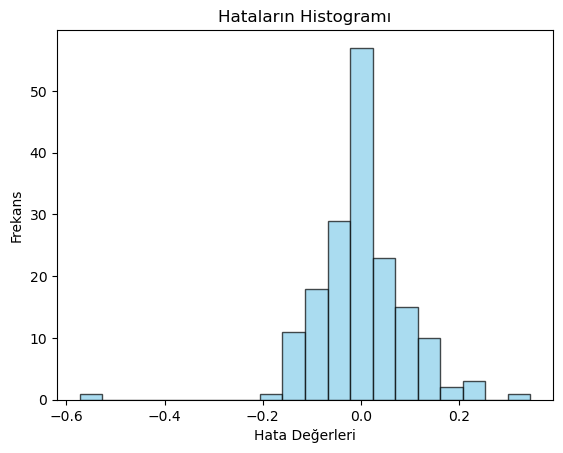

In [158]:
plt.hist(residuals_cube, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Hataların Histogramı')
plt.xlabel('Hata Değerleri')
plt.ylabel('Frekans')
plt.show()


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">1.4. Min-Max scaling:
</h1>

In [159]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
df_minmax = df.copy()

df_minmax[['youtube', 'facebook', 'newspaper', 'sales']] = scaler_minmax.fit_transform(df[['youtube', 'facebook', 'newspaper', 'sales']])


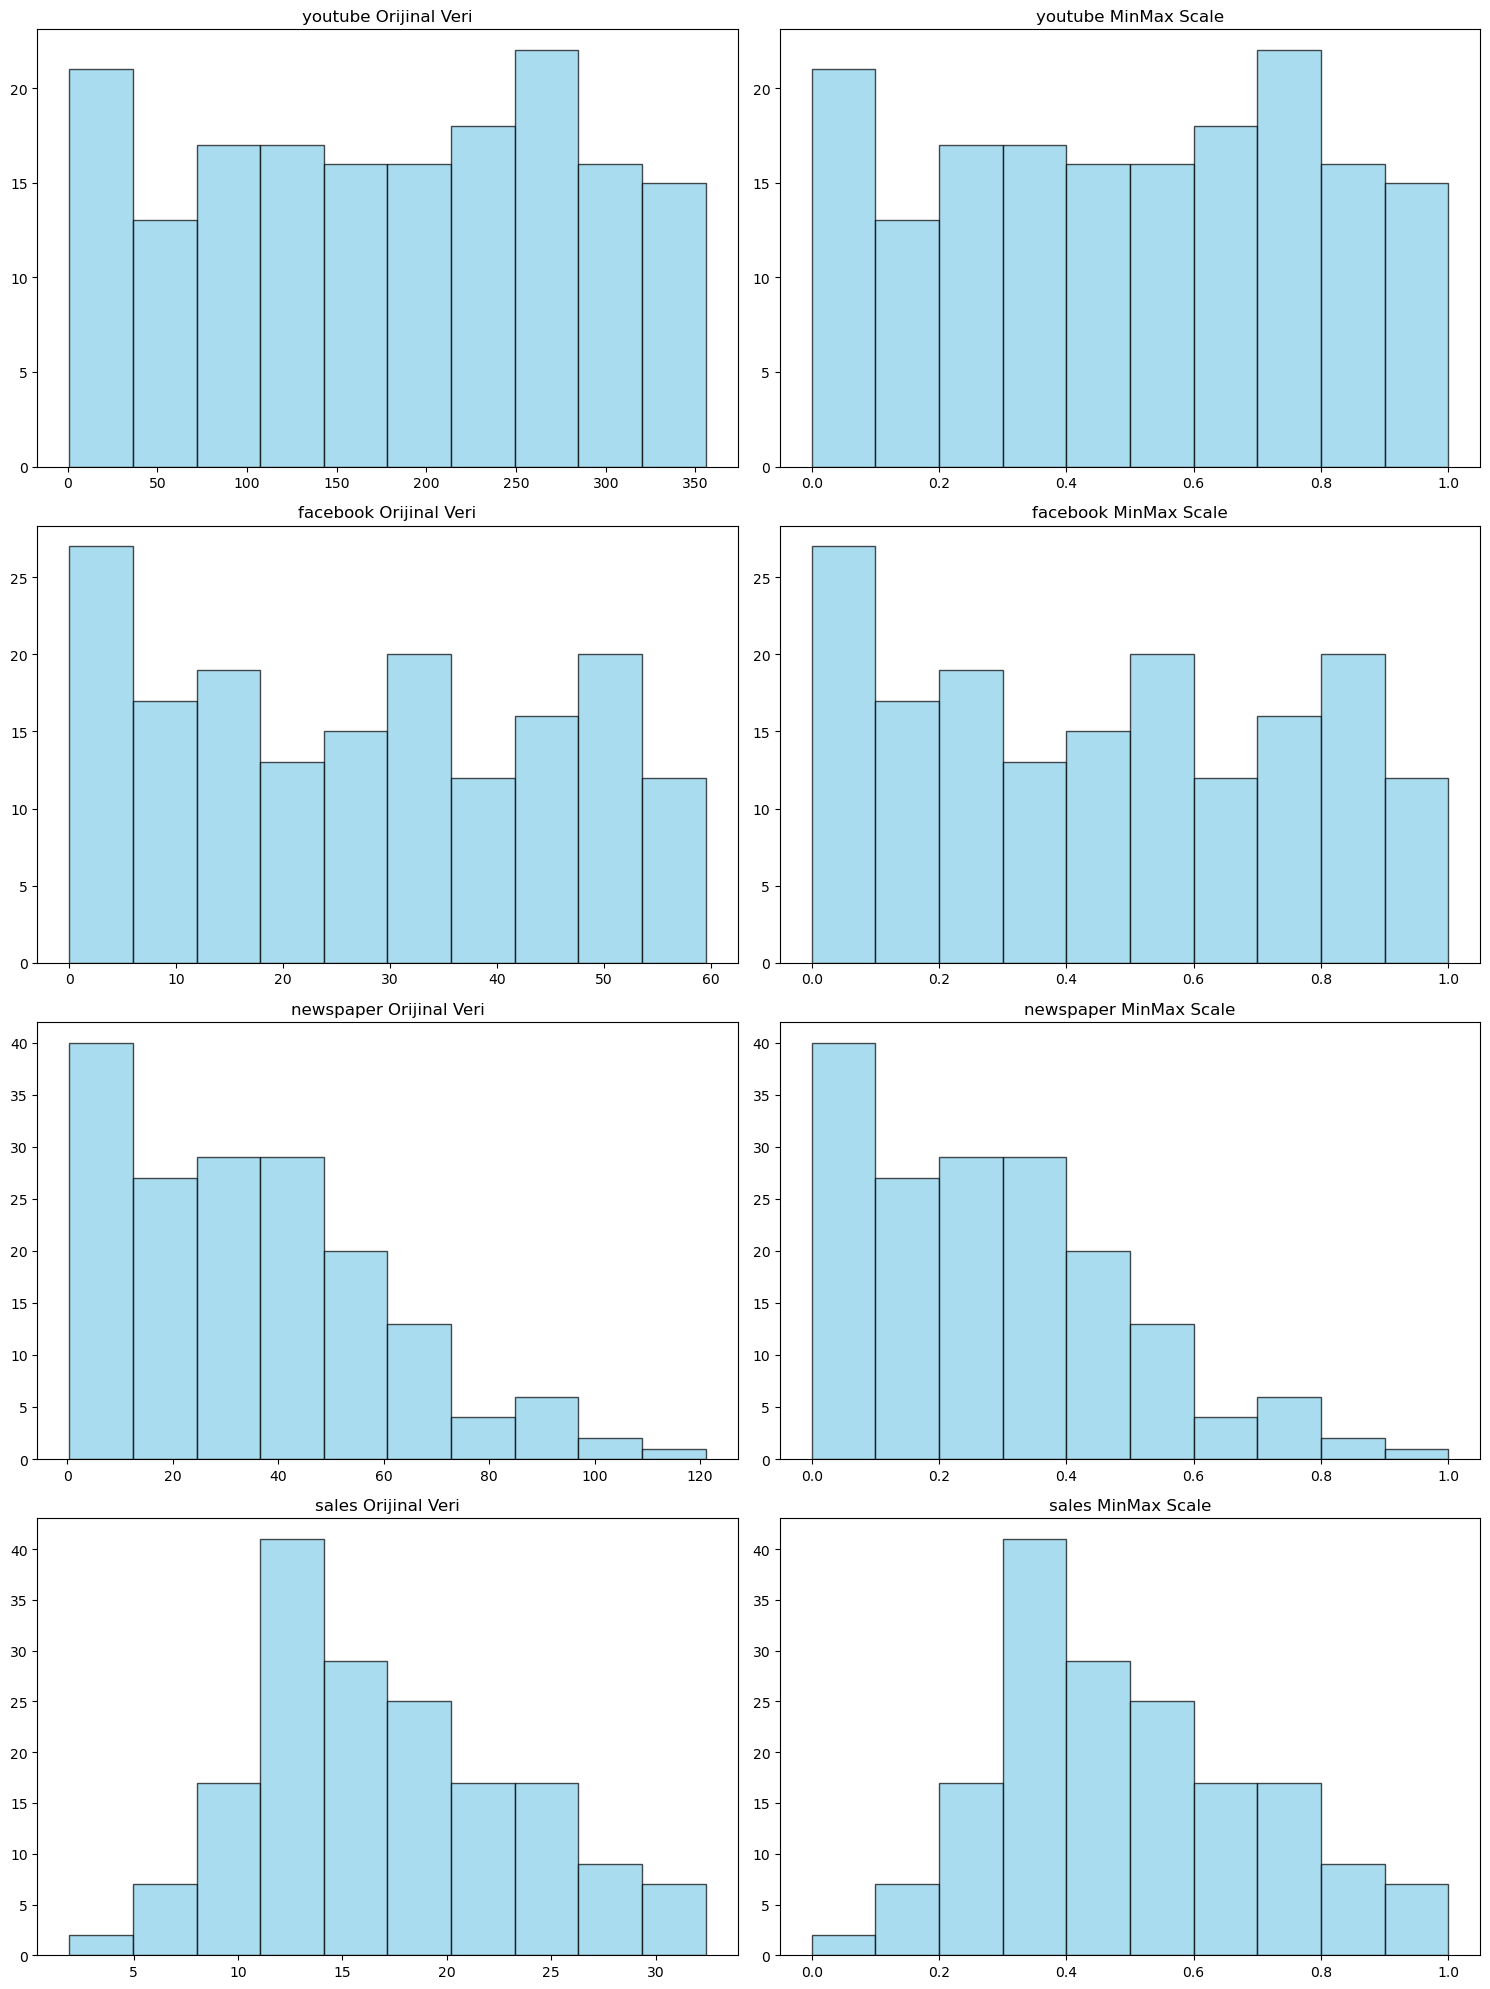

In [160]:
plt.figure(figsize=(15, 20))

# Orijinal Veri
plt.subplot(4, 2, 1)
plt.hist(df['youtube'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('youtube Orijinal Veri')

plt.subplot(4, 2, 2)
plt.hist(df_minmax['youtube'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('youtube MinMax Scale')

plt.subplot(4, 2, 3)
plt.hist(df['facebook'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('facebook Orijinal Veri')

plt.subplot(4, 2, 4)
plt.hist(df_minmax['facebook'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('facebook MinMax Scale')

plt.subplot(4, 2, 5)
plt.hist(df['newspaper'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('newspaper Orijinal Veri')

plt.subplot(4, 2, 6)
plt.hist(df_minmax['newspaper'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('newspaper MinMax Scale')

plt.subplot(4, 2, 7)
plt.hist(df['sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('sales Orijinal Veri')

plt.subplot(4, 2, 8)
plt.hist(df_minmax['sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('sales MinMax Scale')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [161]:
X = sm.add_constant(df_minmax[['youtube', 'facebook', 'newspaper']])
y = df_minmax['sales']
model = sm.OLS(y, X).fit(disp=0)
residuals = model.resid

###### Shapiro Wilk

In [162]:
stat, p_value = shapiro(residuals)

print(f'Shapiro-Wilk Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Shapiro-Wilk Test İstatistiği: 0.9139
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


###### Kolmogorov-Smirnov

In [163]:

stat, p_value = kstest(residuals, 'norm')

print(f'Kolmogorov-Smirnov Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Kolmogorov-Smirnov Test İstatistiği: 0.4560
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


###### Jarque-Bera Testi

In [164]:
stat, p_value = jarque_bera(residuals)

print(f'Jarque-Bera Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Jarque-Bera Test İstatistiği: 162.7917
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


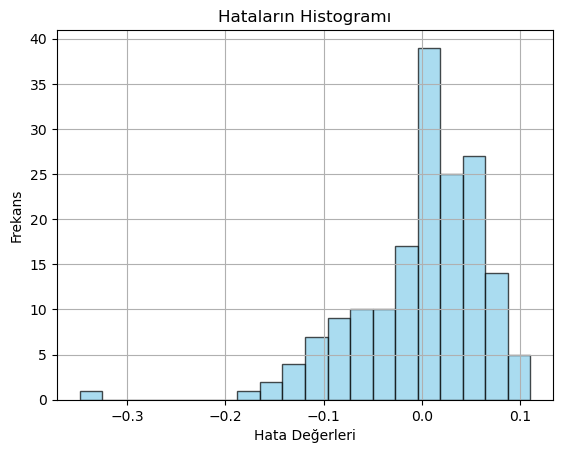

In [165]:
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Hataların Histogramı')
plt.xlabel('Hata Değerleri')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">1.5. Standard scaling:
</h1>

In [166]:
scaler_standard = StandardScaler()
df_standard = df.copy()

df_standard[['youtube', 'facebook', 'newspaper', 'sales']] = scaler_standard.fit_transform(df[['youtube', 'facebook', 'newspaper', 'sales']])

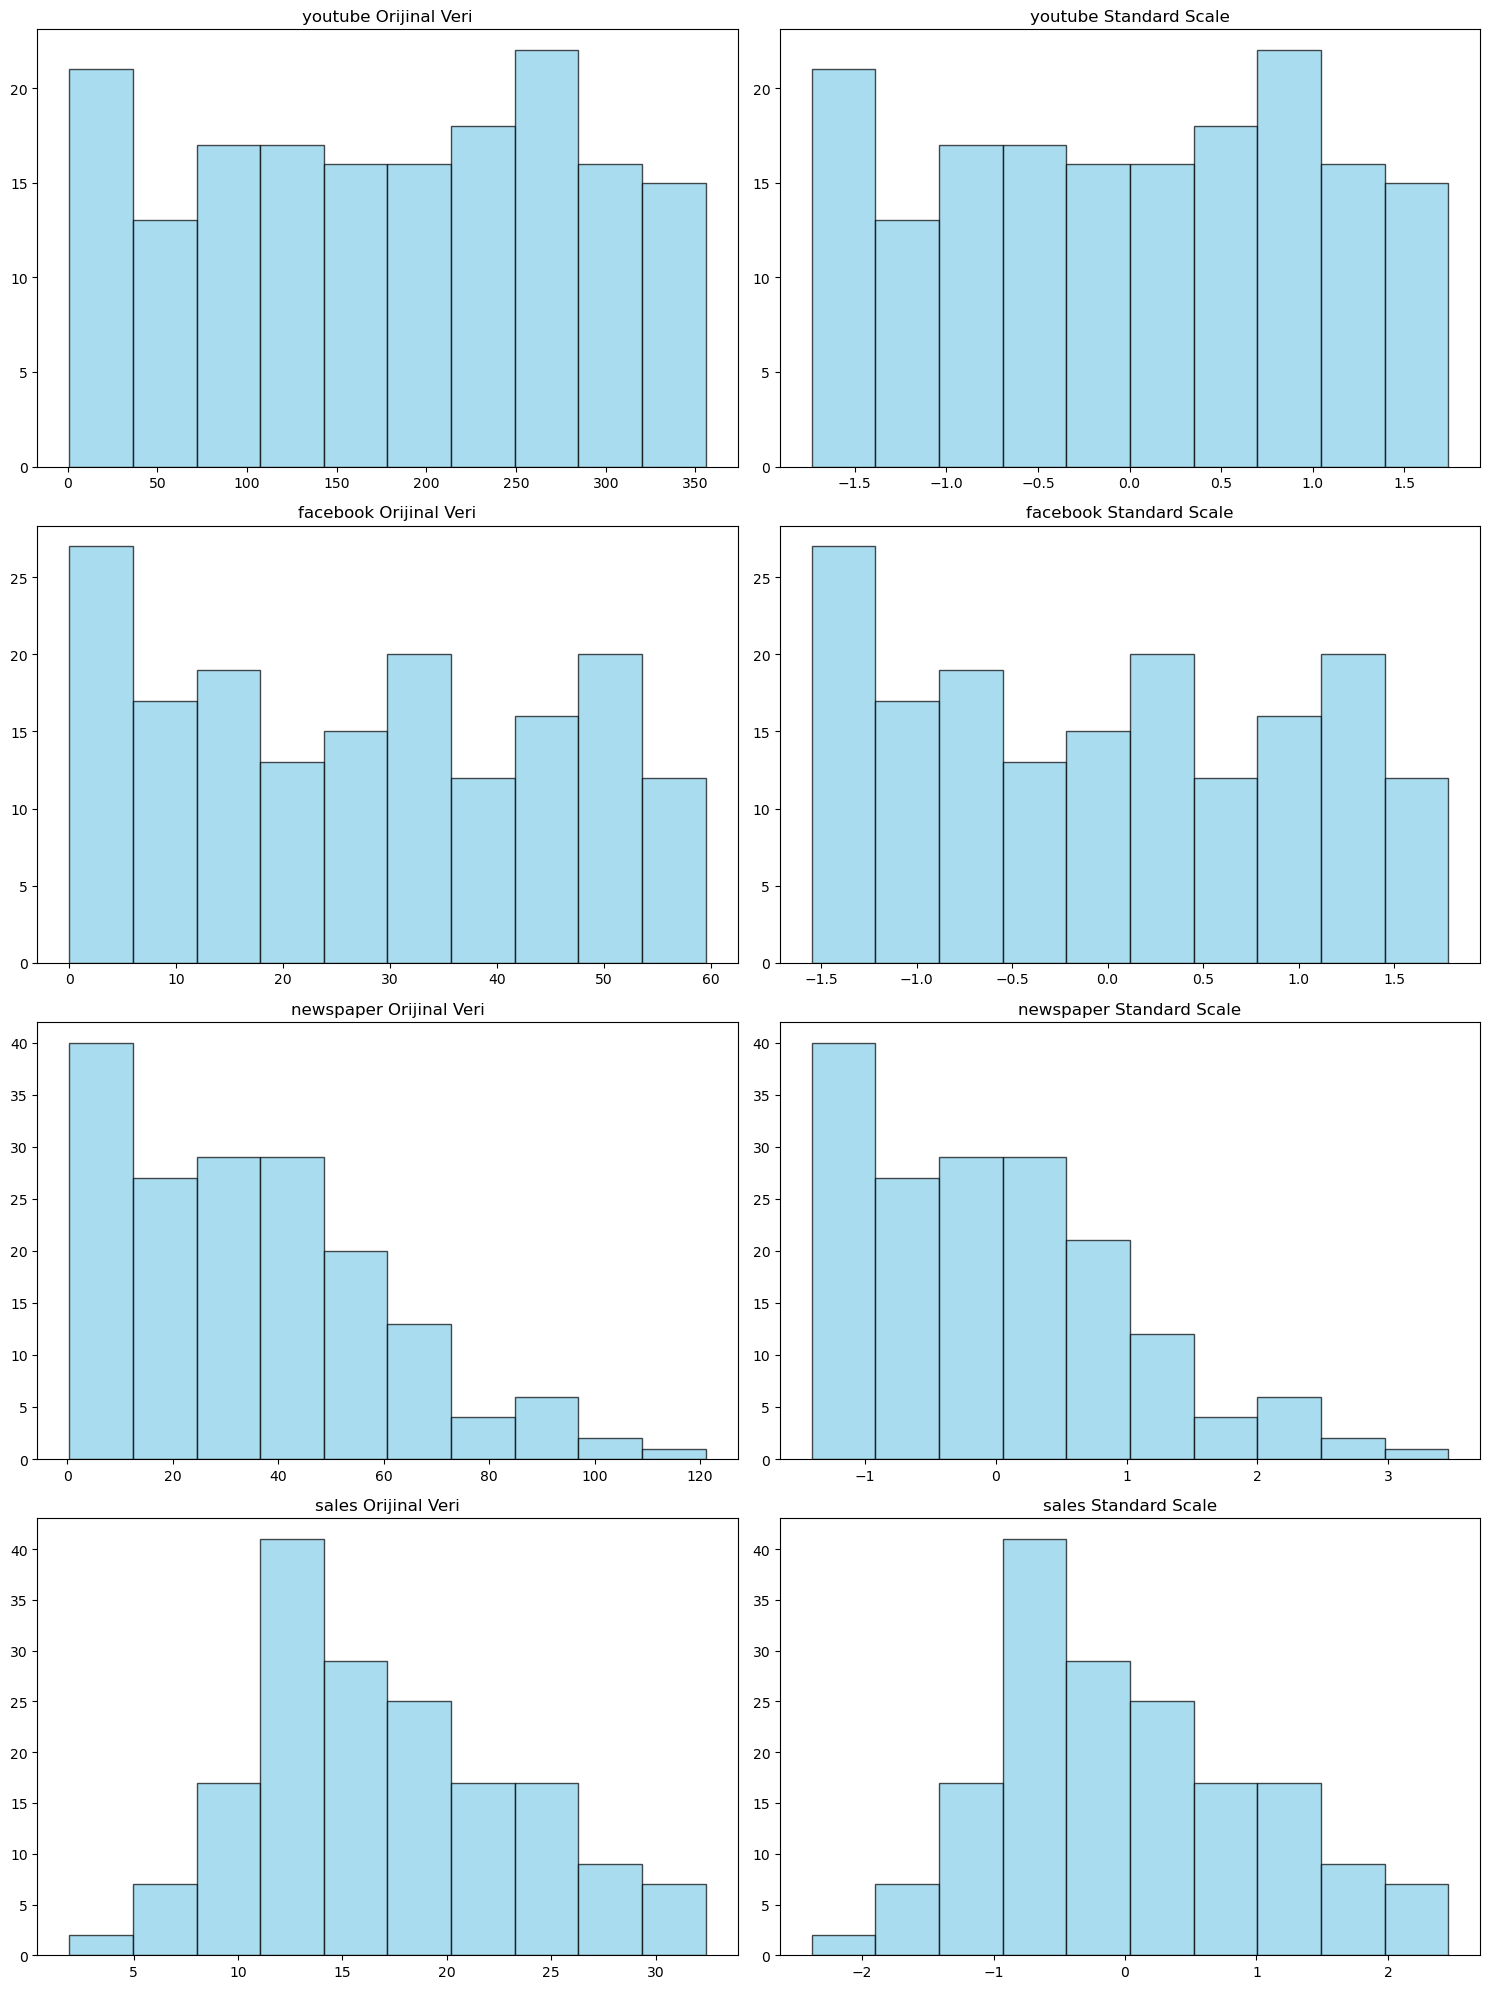

In [167]:
plt.figure(figsize=(15, 20))

# Orijinal Veri
plt.subplot(4, 2, 1)
plt.hist(df['youtube'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('youtube Orijinal Veri')

plt.subplot(4, 2, 2)
plt.hist(df_standard['youtube'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('youtube Standard Scale')

plt.subplot(4, 2, 3)
plt.hist(df['facebook'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('facebook Orijinal Veri')

plt.subplot(4, 2, 4)
plt.hist(df_standard['facebook'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('facebook Standard Scale')

plt.subplot(4, 2, 5)
plt.hist(df['newspaper'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('newspaper Orijinal Veri')

plt.subplot(4, 2, 6)
plt.hist(df_standard['newspaper'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('newspaper Standard Scale')

plt.subplot(4, 2, 7)
plt.hist(df['sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('sales Orijinal Veri')

plt.subplot(4, 2, 8)
plt.hist(df_standard['sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('sales Standard Scale')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [168]:
X = sm.add_constant(df_standard[['youtube', 'facebook', 'newspaper']])
y = df_standard['sales']
model = sm.OLS(y, X).fit(disp=0)
residuals = model.resid

###### Shapiro Wilk


In [169]:
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Shapiro-Wilk Test İstatistiği: 0.9139
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


###### Kolmogorov-Smirnov


In [170]:
stat, p_value = kstest(residuals, 'norm')
print(f'Kolmogorov-Smirnov Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Kolmogorov-Smirnov Test İstatistiği: 0.3100
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


###### Jarque-Bera Testi


In [171]:
stat, p_value = jarque_bera(residuals)

print(f'Jarque-Bera Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Jarque-Bera Test İstatistiği: 162.7917
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


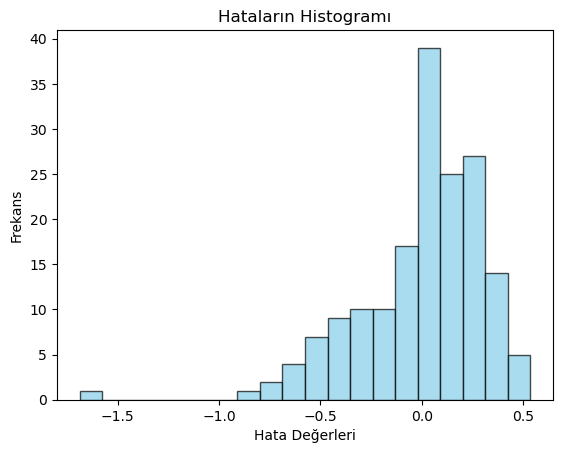

In [172]:
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Hataların Histogramı')
plt.xlabel('Hata Değerleri')
plt.ylabel('Frekans')
plt.show()


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">1.6.  Robust Scaling:
</h1>

In [173]:
scaler_robust = RobustScaler()
df_robust = df.copy()
df_robust[['youtube', 'facebook', 'newspaper', 'sales']] = scaler_robust.fit_transform(df[['youtube', 'facebook', 'newspaper', 'sales']])


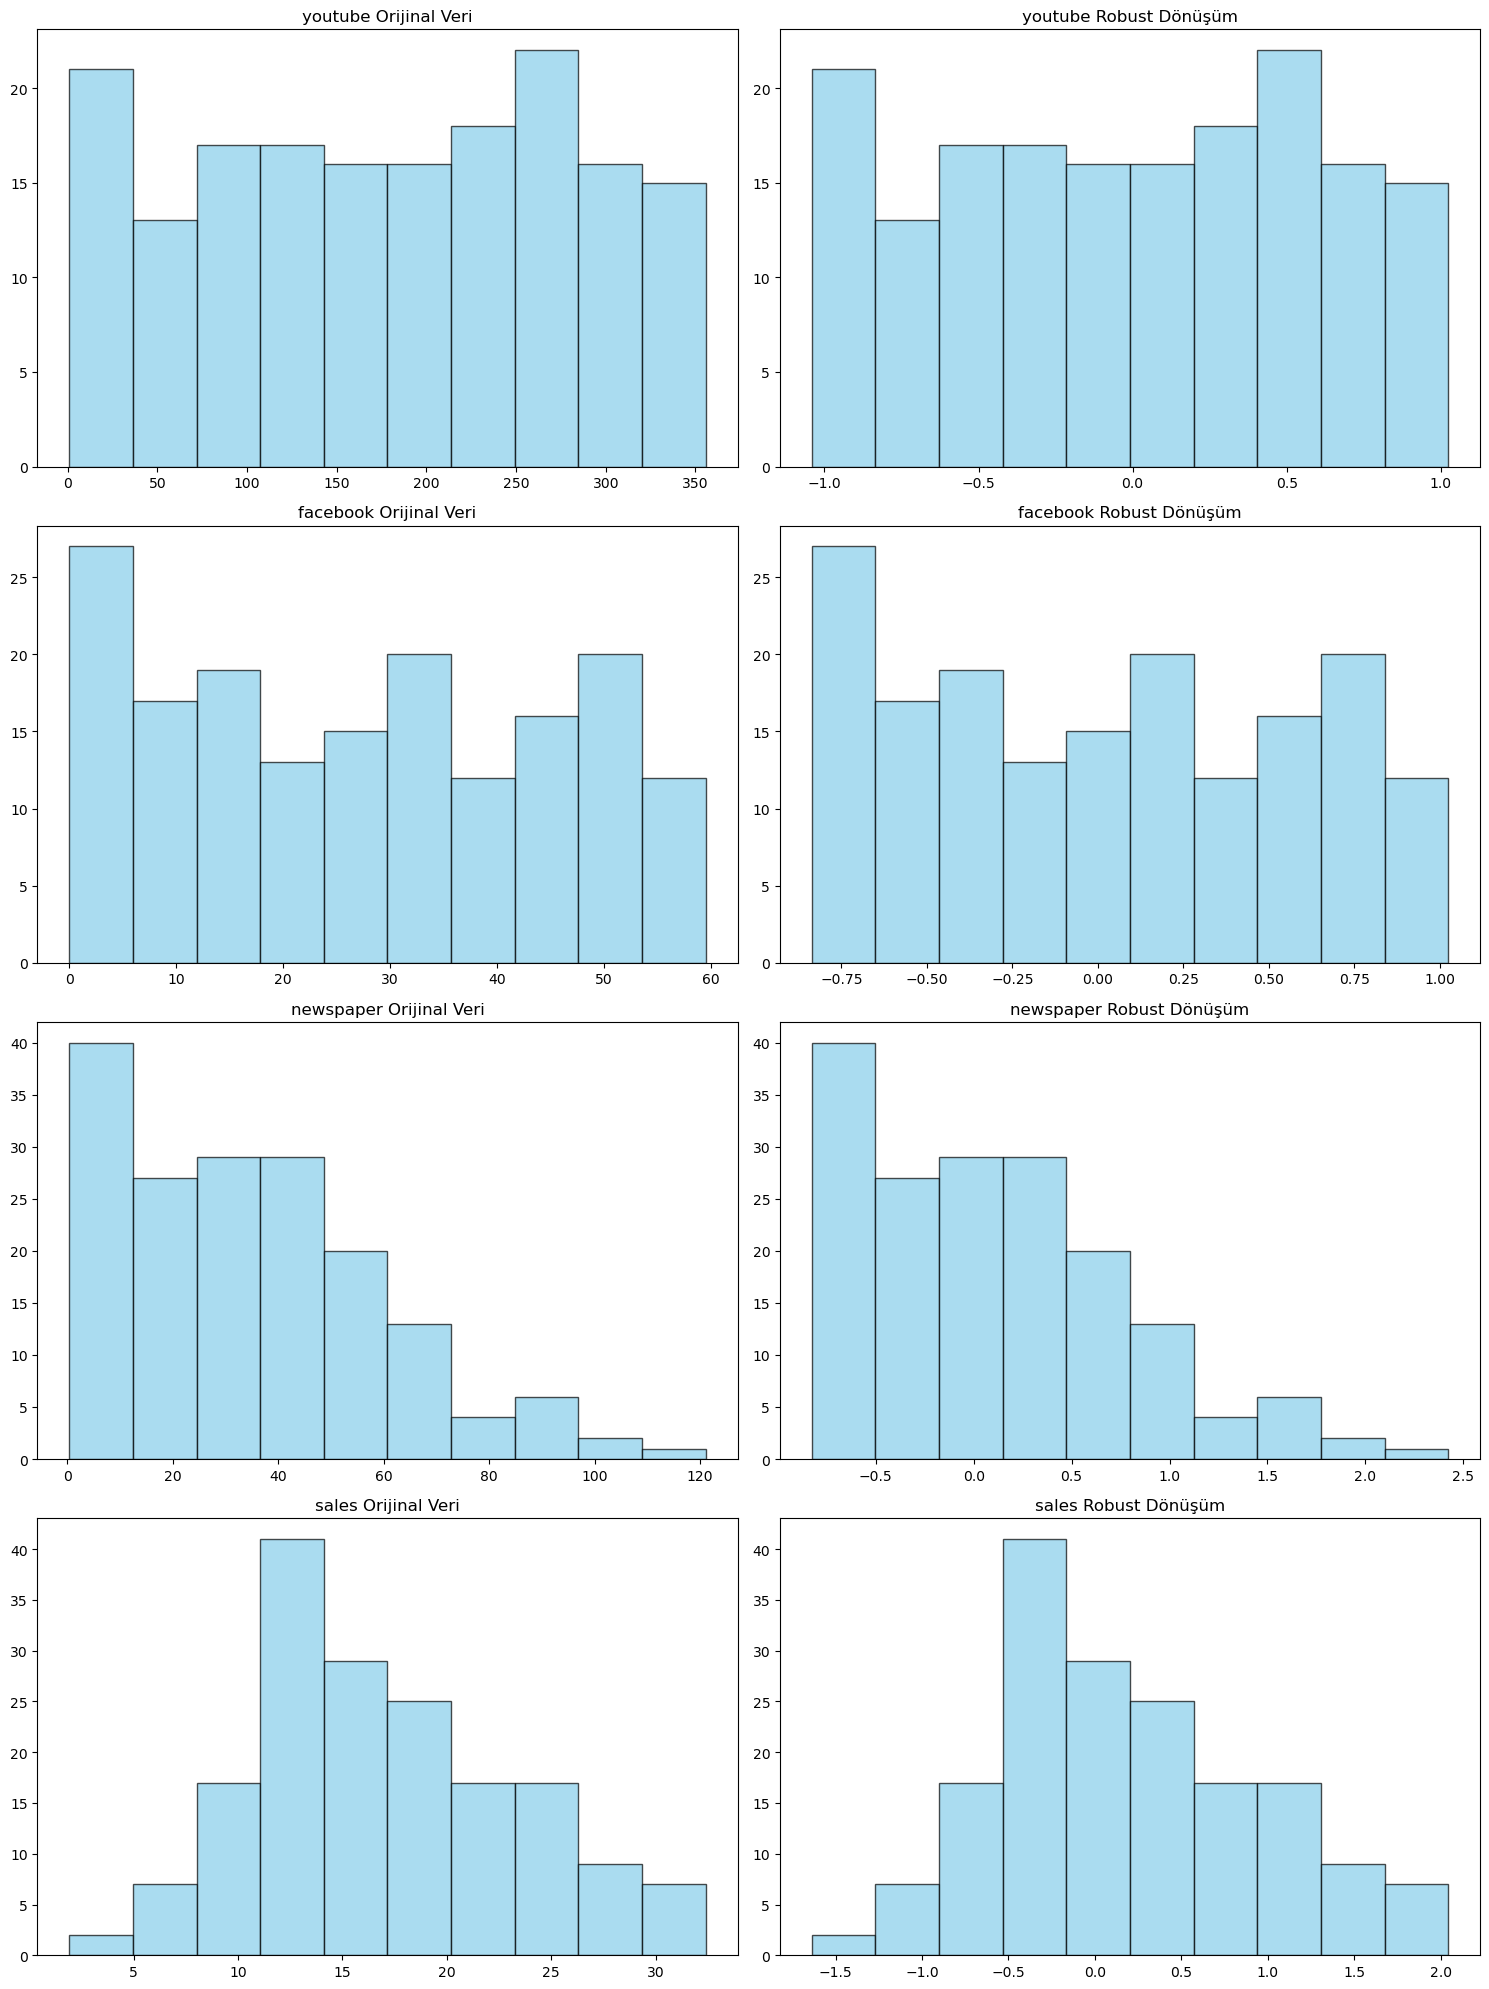

In [174]:
plt.figure(figsize=(15, 20))

# Orijinal Veri
plt.subplot(4, 2, 1)
plt.hist(df['youtube'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('youtube Orijinal Veri')

plt.subplot(4, 2, 2)
plt.hist(df_robust['youtube'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('youtube Robust Dönüşüm')

plt.subplot(4, 2, 3)
plt.hist(df['facebook'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('facebook Orijinal Veri')

plt.subplot(4, 2, 4)
plt.hist(df_robust['facebook'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('facebook Robust Dönüşüm')

plt.subplot(4, 2, 5)
plt.hist(df['newspaper'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('newspaper Orijinal Veri')

plt.subplot(4, 2, 6)
plt.hist(df_robust['newspaper'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('newspaper Robust Dönüşüm')

plt.subplot(4, 2, 7)
plt.hist(df['sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('sales Orijinal Veri')

plt.subplot(4, 2, 8)
plt.hist(df_robust['sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('sales Robust Dönüşüm')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [175]:
X = sm.add_constant(df_robust[['youtube', 'facebook', 'newspaper']])
y = df_standard['sales']
model = sm.OLS(y, X).fit(disp=0)
residuals = model.resid

###### Shapiro Wilk


In [176]:
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Shapiro-Wilk Test İstatistiği: 0.9139
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


 ###### Kolmogorov-Smirnov


In [177]:
stat, p_value = kstest(residuals, 'norm')
print(f'Kolmogorov-Smirnov Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Kolmogorov-Smirnov Test İstatistiği: 0.3100
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


###### Jarque-Bera Testi


In [178]:
stat, p_value = jarque_bera(residuals)

print(f'Jarque-Bera Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Jarque-Bera Test İstatistiği: 162.7917
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


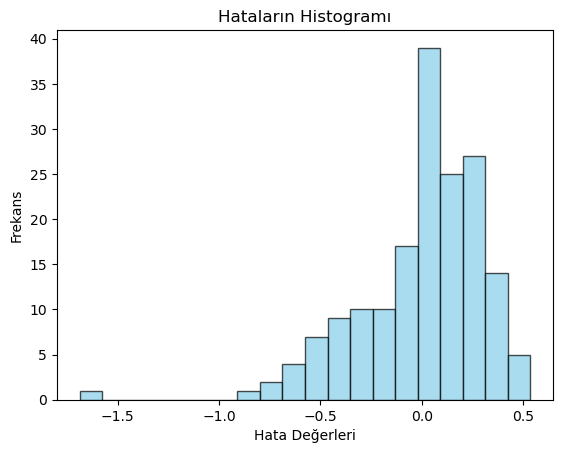

In [179]:
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Hataların Histogramı')
plt.xlabel('Hata Değerleri')
plt.ylabel('Frekans')
plt.show()


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">1.7. Yeo-Johnson:
</h1>

In [180]:
scaler_power = PowerTransformer(method='yeo-johnson', standardize=True)
df_power = df.copy()

# Add a small constant to avoid non-positive values
df_power[['youtube', 'facebook', 'newspaper', 'sales']] += epsilon

df_power[['youtube', 'facebook', 'newspaper', 'sales']] = scaler_power.fit_transform(df_power[['youtube', 'facebook', 'newspaper', 'sales']])

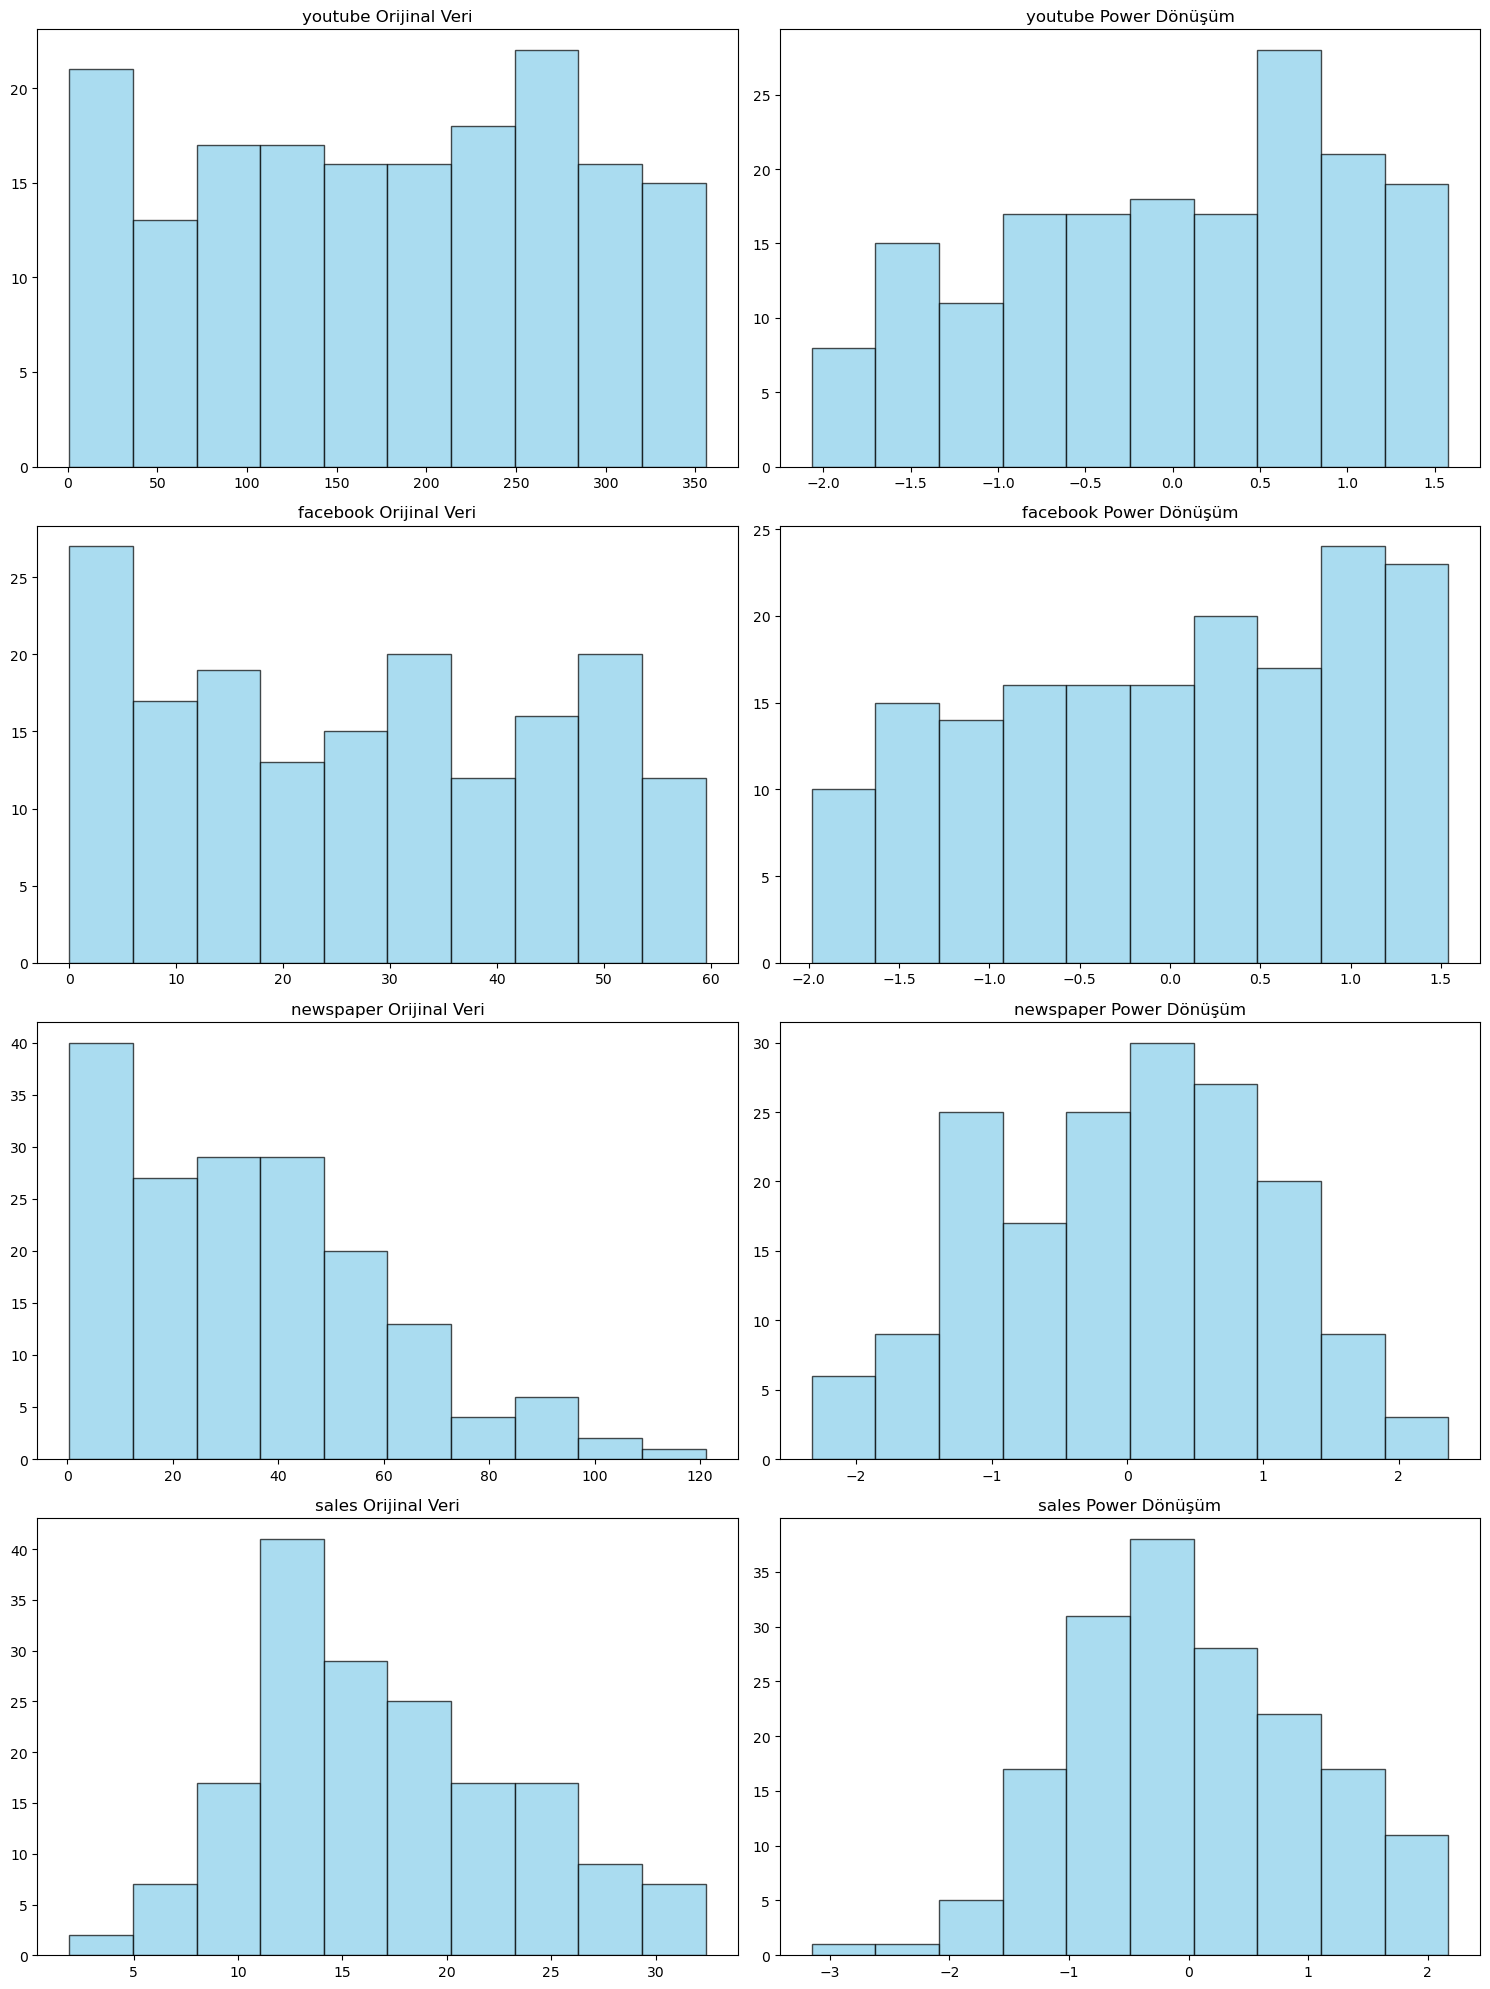

In [181]:
plt.figure(figsize=(15, 20))

# Orijinal Veri
plt.subplot(4, 2, 1)
plt.hist(df['youtube'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('youtube Orijinal Veri')

plt.subplot(4, 2, 2)
plt.hist(df_power['youtube'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('youtube Power Dönüşüm')

plt.subplot(4, 2, 3)
plt.hist(df['facebook'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('facebook Orijinal Veri')

plt.subplot(4, 2, 4)
plt.hist(df_power['facebook'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('facebook Power Dönüşüm')

plt.subplot(4, 2, 5)
plt.hist(df['newspaper'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('newspaper Orijinal Veri')

plt.subplot(4, 2, 6)
plt.hist(df_power['newspaper'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('newspaper Power Dönüşüm')

plt.subplot(4, 2, 7)
plt.hist(df['sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('sales Orijinal Veri')

plt.subplot(4, 2, 8)
plt.hist(df_power['sales'], color='skyblue', edgecolor='black', alpha=0.7)
plt.title('sales Power Dönüşüm')

plt.tight_layout()  
plt.show()

In [182]:
X = sm.add_constant(df_robust[['youtube', 'facebook', 'newspaper']])
y = df_standard['sales']
model = sm.OLS(y, X).fit(disp=0)
residuals = model.resid

###### Shapiro Wilk


In [183]:
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Shapiro-Wilk Test İstatistiği: 0.9139
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


 ###### Kolmogorov-Smirnov


In [184]:
stat, p_value = kstest(residuals, 'norm')
print(f'Kolmogorov-Smirnov Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Kolmogorov-Smirnov Test İstatistiği: 0.3100
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


###### Jarque-Bera Testi


In [185]:
stat, p_value = jarque_bera(residuals)

print(f'Jarque-Bera Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

Jarque-Bera Test İstatistiği: 162.7917
p-value: 0.0000
H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.


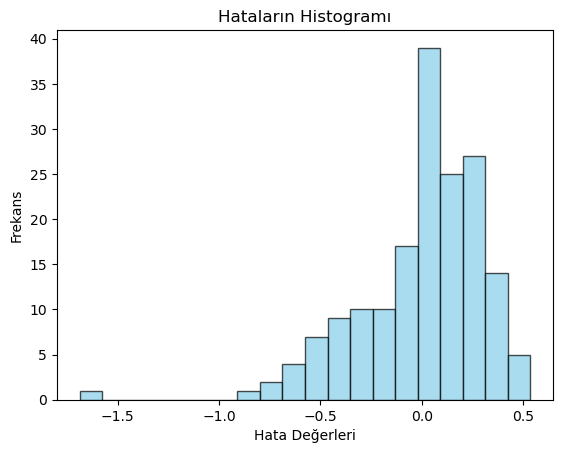

In [186]:
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Hataların Histogramı')
plt.xlabel('Hata Değerleri')
plt.ylabel('Frekans')
plt.show()


<h1 style="background-color:#FFA500;font-family:newtimeroman;font-size:200%;text-align:left;color:#FFFFFF">4-Aykırı Değerlerin İncelenmesi ve Düzeltilmesi
</h1>


In [187]:
df = data.copy()

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:center;color:#FFFFFF">1)Sales Değişkeni için Aykırı Değer Tespiti
</h1>



<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">1.1) Boxplot
</h1>



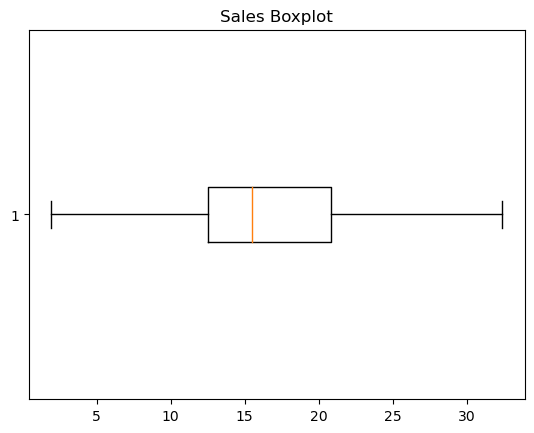

In [188]:
plt.boxplot(df["sales"],vert=False)
plt.title("Sales Boxplot")
plt.show()

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">1.2)Tukey's IQR Yöntemi ile Aykırı Değer Tespiti
</h1>



In [189]:
Q1 = df["sales"].quantile(0.25)
Q3 = df["sales"].quantile(0.75)
IQR = Q3-Q1
BM = (df["sales"] > (Q3+1.5 *IQR)) | (df["sales"] < (Q1-1.5 *IQR))
up_limit = Q3 + 1.5 * IQR
low_limit = Q1 - 1.5 * IQR
up_outliers = df["sales"] > up_limit
low_outliers = df["sales"] < low_limit


###### Aykırı değer %liği

In [190]:
((len(df.loc[low_outliers]) + len(df.loc[up_outliers]) )/ len(df)) * 100


0.0

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">1.3)Z-Skor
</h1>



In [191]:
z_scores = np.abs((df["sales"] -df["sales"].mean()) / df["sales"].std())
aykiri_esik_degeri = 3
aykiri_degerler = df["sales"][(z_scores > aykiri_esik_degeri)]
print("Aykırı Değerler:")
print(aykiri_degerler)

Aykırı Değerler:
Series([], Name: sales, dtype: float64)


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">1.4)Grubbs Testi
</h1>



In [192]:
def grubbs_test(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    n = len(data)
    g_calculated = max(abs(data - mean)) / std_dev
    critical_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    if g_calculated > critical_value:
        return "Ma ya da min değer aykırı değerdir"
    else:
        return "Max ya da min değer aykırı değer değildir"
print("Grubbs Testi sonucu:", grubbs_test(df["sales"]))


Grubbs Testi sonucu: Max ya da min değer aykırı değer değildir


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">1.5)Dixon's Q Testi
</h1>



In [193]:
def dixon_test(data):
    data = np.sort(data)
    q = (data[1] - data[0]) / (data[-1] - data[0])
    q_critical = 0.29  
    if q > q_critical:
        return "Aykırı değer var"
    else:
        return "Aykırı değer yok"
print("Dixon's Q Testi sonucu:", dixon_test(df["sales"]))



Dixon's Q Testi sonucu: Aykırı değer yok


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">1.6)MAD
</h1>



In [194]:
def mad_based_outlier(data, threshold=3):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    modified_z_score = 0.6745 * (data - median) / mad
    return np.abs(modified_z_score) > threshold
outliers = df[mad_based_outlier(df["sales"])]
outliers

,youtube,facebook,newspaper,sales


In [195]:
df[BM]

,youtube,facebook,newspaper,sales


In [196]:
df.drop(df[BM].index, axis=0, inplace=True)


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:center;color:#FFFFFF">2)Facebook Değişkeni için Aykırı Değer Tespiti
</h1>



<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">2.1)Boxplot
</h1>



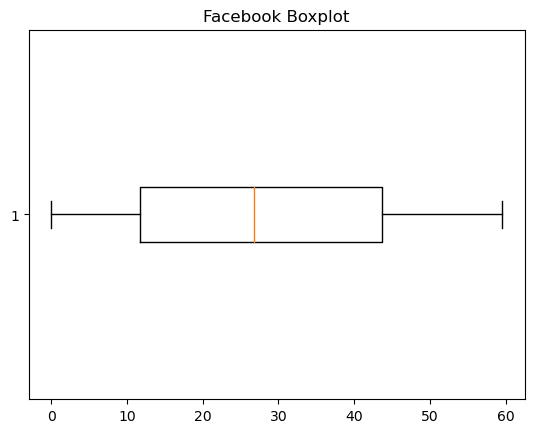

In [197]:
plt.boxplot(df["facebook"],vert=False)
plt.title("Facebook Boxplot")
plt.show()

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">2.2)Tukey's IQR Yöntemi ile Aykırı Değer Tespiti
</h1>



In [198]:
Q1 = df["facebook"].quantile(0.25)
Q3 = df["facebook"].quantile(0.75)
IQR = Q3-Q1
BM = (df["facebook"] > (Q3+1.5 *IQR)) | (df["facebook"] < (Q1-1.5 *IQR))
up_limit = Q3 + 1.5 * IQR
low_limit = Q1 - 1.5 * IQR
up_outliers = df["facebook"] > up_limit
low_outliers = df["facebook"] < low_limit


In [199]:
df[BM]

,youtube,facebook,newspaper,sales


###### Aykırı değer yüzdeliği

In [200]:
((len(df.loc[low_outliers]) + len(df.loc[up_outliers]) )/ len(df)) * 100


0.0

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">2.3)Z-Skor
</h1>



In [201]:
z_scores = np.abs((df["facebook"] -df["facebook"].mean()) / df["facebook"].std())
aykiri_esik_degeri = 3
aykiri_degerler = df["facebook"][(z_scores > aykiri_esik_degeri)]
print("Aykırı Değerler:")
print(aykiri_degerler)

Aykırı Değerler:
Series([], Name: facebook, dtype: float64)


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">2.4)Grubbs Testi
</h1>



In [202]:
def grubbs_test(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    n = len(data)
    g_calculated = max(abs(data - mean)) / std_dev
    critical_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    if g_calculated > critical_value:
        return "Ma ya da min değer aykırı değerdir"
    else:
        return "Max ya da min değer aykırı değer değildir"
print("Grubbs Testi sonucu:", grubbs_test(df["facebook"]))


Grubbs Testi sonucu: Max ya da min değer aykırı değer değildir


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">2.5)Dixon Q
</h1>



In [203]:
def dixon_test(data):
    data = np.sort(data)
    q = (data[1] - data[0]) / (data[-1] - data[0])
    q_critical = 0.29  
    if q > q_critical:
        return "Aykırı değer var"
    else:
        return "Aykırı değer yok"
print("Dixon's Q Testi sonucu:", dixon_test(df["facebook"]))



Dixon's Q Testi sonucu: Aykırı değer yok


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">2.6)MAD
</h1>



In [204]:
def mad_based_outlier(data, threshold=3):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    modified_z_score = 0.6745 * (data - median) / mad
    return np.abs(modified_z_score) > threshold
outliers = df[mad_based_outlier(df["facebook"])]
outliers

,youtube,facebook,newspaper,sales


In [205]:
df[BM]

,youtube,facebook,newspaper,sales


In [206]:
df.drop(df[BM].index, axis=0, inplace=True)


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:center;color:#FFFFFF">3)Newspaper Değişkeni için Aykırı Değer Tespiti
</h1>



<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">3.1)Boxplot
</h1>



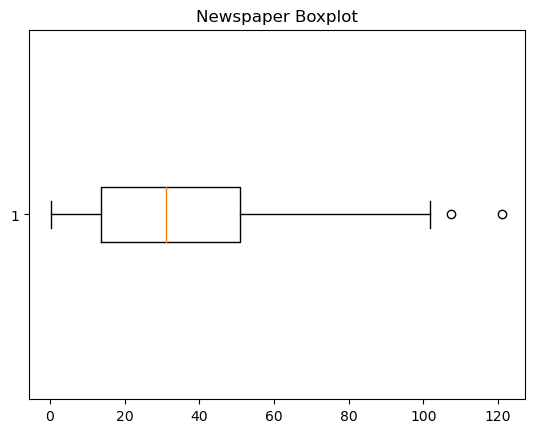

In [207]:
plt.boxplot(df["newspaper"],vert=False)
plt.title("Newspaper Boxplot")
plt.show()

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">3.2)Tukey's IQR Yöntemi ile Aykırı Değer Tespiti
</h1>



In [208]:
Q1 = df["newspaper"].quantile(0.25)
Q3 = df["newspaper"].quantile(0.75)
IQR = Q3-Q1
BM = (df["newspaper"] > (Q3+1.5 *IQR)) | (df["newspaper"] < (Q1-1.5 *IQR))
up_limit = Q3 + 1.5 * IQR
low_limit = Q1 - 1.5 * IQR
up_outliers = df["newspaper"] > up_limit
low_outliers = df["newspaper"] < low_limit


In [209]:
df["BM"]

KeyError: 'BM'

###### Aykırı değer yüzdeliği

In [ ]:
((len(df.loc[low_outliers]) + len(df.loc[up_outliers]) )/ len(df)) * 100


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">3.3)Z-Skor
</h1>



In [ ]:
z_scores = np.abs((df["newspaper"] -df["newspaper"].mean()) /df["newspaper"].std())
aykiri_esik_degeri = 3
aykiri_degerler = df["newspaper"][(z_scores > aykiri_esik_degeri)]
print("Aykırı Değerler:")
print(aykiri_degerler)

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">3.4)Grubbs Testi
</h1>



In [ ]:
def grubbs_test(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    n = len(data)
    g_calculated = max(abs(data - mean)) / std_dev
    critical_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    if g_calculated > critical_value:
        return "Ma ya da min değer aykırı değerdir"
    else:
        return "Max ya da min değer aykırı değer değildir"
print("Grubbs Testi sonucu:", grubbs_test(df["newspaper"]))


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">3.5)Dixon Q
</h1>



In [ ]:
def dixon_test(data):
    data = np.sort(data)
    q = (data[1] - data[0]) / (data[-1] - data[0])
    q_critical = 0.29  
    if q > q_critical:
        return "Aykırı değer var"
    else:
        return "Aykırı değer yok"
print("Dixon's Q Testi sonucu:", dixon_test(df["newspaper"]))



<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">3.6)MAD
</h1>



In [ ]:
def mad_based_outlier(data, threshold=3):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    modified_z_score = 0.6745 * (data - median) / mad
    return np.abs(modified_z_score) > threshold
outliers = df[mad_based_outlier(df["newspaper"])]
outliers

In [ ]:
df[BM]

In [ ]:
df.drop(df[BM].index, axis=0, inplace=True)


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:180%;text-align:center;color:#FFFFFF">4)Youtube Değişkeni için Aykırı Değer Tespiti
</h1>



<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">4.1)Boxplot
</h1>



In [ ]:
plt.boxplot(df["youtube"],vert=False)
plt.title("Youtube Boxplot")
plt.show()

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">4.2)Tukey's IQR Yöntemi ile Aykırı Değer Tespiti
</h1>



In [ ]:
Q1 = df["youtube"].quantile(0.25)
Q3 = df["youtube"].quantile(0.75)
IQR = Q3-Q1
BM = (df["youtube"] > (Q3+1.5 *IQR)) | (df["youtube"] < (Q1-1.5 *IQR))
up_limit = Q3 + 1.5 * IQR
low_limit = Q1 - 1.5 * IQR
up_outliers = df["youtube"] > up_limit
low_outliers = df["youtube"] < low_limit


In [ ]:
df["BM"]

###### Aykırı değer yüzdeliği

In [ ]:
((len(df.loc[low_outliers]) + len(df.loc[up_outliers]) )/ len(df)) * 100


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">4.3)Z-Skor
</h1>



In [ ]:
z_scores = np.abs((df["youtube"] -df["youtube"].mean()) / df["youtube"].std())
aykiri_esik_degeri = 3
aykiri_degerler = df["youtube"][(z_scores > aykiri_esik_degeri)]
print("Aykırı Değerler:")
print(aykiri_degerler)

<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">4.4)Grubbs Testi
</h1>



In [ ]:
def grubbs_test(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    n = len(data)
    g_calculated = max(abs(data - mean)) / std_dev
    critical_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    if g_calculated > critical_value:
        return "Ma ya da min değer aykırı değerdir"
    else:
        return "Max ya da min değer aykırı değer değildir"
print("Grubbs Testi sonucu:", grubbs_test(df["youtube"]))


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">4.5)Dixon Q
</h1>



In [ ]:
def dixon_test(data):
    data = np.sort(data)
    q = (data[1] - data[0]) / (data[-1] - data[0])
    q_critical = 0.29  
    if q > q_critical:
        return "Aykırı değer var"
    else:
        return "Aykırı değer yok"
print("Dixon's Q Testi sonucu:", dixon_test(df["youtube"]))



<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">4.6)MAD
</h1>



In [ ]:
def mad_based_outlier(data, threshold=3):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    modified_z_score = 0.6745 * (data - median) / mad
    return np.abs(modified_z_score) > threshold
outliers = df[mad_based_outlier(df["youtube"])]
outliers

In [ ]:
df[BM]

In [ ]:
df.drop(df[BM].index, axis=0, inplace=True)


<h1 style="background-color:#FF00F7;font-family:newtimeroman;font-size:150%;text-align:left;color:#FFFFFF">Aykırı değerler kaldırıldıktan sonra tekrardan bir test yapalım
</h1>



In [ ]:
X = sm.add_constant(df[['youtube', 'facebook', 'newspaper']])
y = df['sales']
model = sm.OLS(y, X).fit(disp=0)
residuals = model.resid

###### Shapiro Wilk
 

In [ ]:
stat, p_value = shapiro(residuals)

print(f'Shapiro-Wilk Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")


###### Kolmogorov-Smirnov


In [ ]:
stat, p_value = kstest(residuals, 'norm')

print(f'Kolmogorov-Smirnov Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

###### Jargue - Bera 

In [ ]:
stat, p_value = jarque_bera(residuals)

print(f'Jarque-Bera Test İstatistiği: {stat:.4f}')
print(f'p-value: {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("H0 hipotezi reddedildi: Hata terimleri normal dağılıma uymaz.")
else:
    print("H0 hipotezi kabul edildi: Hata terimleri normal dağılıma uyar.")

In [ ]:
plt.hist(residuals, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Hataların Histogramı')
plt.xlabel('Hata Değerleri')
plt.ylabel('Frekans')
plt.show()
